# Анализ бизнес-показателей приложения Procrastinate Pro+

## Описание проекта

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.

**Цель исследования:**

Ответить на вопросы:

* Откуда приходят пользователи и какими устройствами они пользуются
* Сколько стоит привлечение пользователей из различных рекламных каналов
* Сколько денег приносит каждый клиент
* Когда расходы на привлечение клиента окупаются
* Какие факторы мешают привлечению клиентов

**Описание данных:**

* visits_info_short.csv хранит лог сервера с информацией о посещениях сайта 
* orders_info_short.csv — информацию о заказах
* costs_info_short.csv — информацию о расходах на рекламу.

## Изучение и предобработка данных

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучим данные и выполним предобработку. 

**Импортирую библиотеки и сохраняю таблицы в переменные:**

In [2]:
# Импорты
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

visits, orders, costs = (
    pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv'),  # траты на рекламу
)

**Знакомлюсь с данными и вывожу на экран первые 5 строк:**

In [3]:
display(visits.head(5));

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

**Вывожу на экран наименования столбцов "visits":**

In [3]:
visits.columns

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

Необходимо привести названия столбцов и данных в них к "змеиному регистру".

**Привожу привести названия столбцов к "змеиному регистру":**

In [4]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end']

In [5]:
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

**Привожу к нижнему регистру значения в столбцах с типом object:**

In [6]:
for i in visits.columns[1:4]: 
    visits[i] = visits[i].str.lower().str.replace(' ','_')

**Описание данных "visits":**

* User Id — уникальный идентификатор пользователя
* Region — страна пользователя
* Device — тип устройства пользователя
* Channel — идентификатор источника перехода
* Session Start — дата и время начала сессии
* Session End — дата и время окончания сессии

**Знакомлюсь с информацией о датафрейме:**

In [7]:
display(visits.head(5));

user_id         region   device  channel        session_start  \
0  981449118918  united_states   iphone  organic  2019-05-01 02:36:01   
1  278965908054  united_states   iphone  organic  2019-05-01 04:46:31   
2  590706206550  united_states      mac  organic  2019-05-01 14:09:25   
3  326433527971  united_states  android   tiptop  2019-05-01 00:29:59   
4  349773784594  united_states      mac  organic  2019-05-01 03:33:35   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


**Привожу данные к типам, необходимым для работы:**

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


**Проверяю данные на наличие пропусков в каждом отдельном столбце "visits":**

In [11]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [12]:
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (16,2), rot = 0, legend = False, fontsize = 16)
            .set_title('Наличие пропусков в колонках' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        display('Пропусков не осталось или произошла ошибка в первой части функции.')

'Пропусков не осталось или произошла ошибка в первой части функции.'

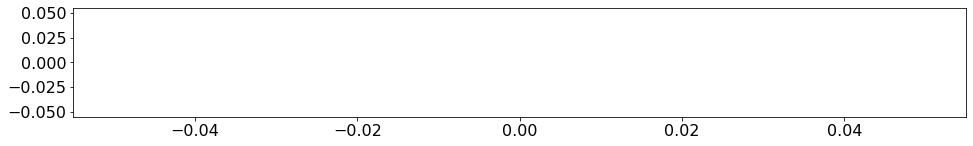

In [13]:
pass_value_barh(visits)

Пропуски в "visits" не обнаружены.

In [14]:
display(visits.head(5));

user_id         region   device  channel       session_start  \
0  981449118918  united_states   iphone  organic 2019-05-01 02:36:01   
1  278965908054  united_states   iphone  organic 2019-05-01 04:46:31   
2  590706206550  united_states      mac  organic 2019-05-01 14:09:25   
3  326433527971  united_states  android   tiptop 2019-05-01 00:29:59   
4  349773784594  united_states      mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

**Проверяю "visits" на наличие явных дубликатов:**

In [15]:
visits.duplicated().sum()

0

Явных дубликатов не найдено.

In [16]:
display(orders.head(5));

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

**Вывожу на экран наименования столбцов "orders":**

In [17]:
orders.columns

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

**Описание данных "orders":**

* User Id — уникальный идентификатор пользователя
* Event Dt — дата и время покупки
* Revenue — сумма заказа

**Привожу привести названия столбцов к "змеиному регистру":**

In [18]:
orders.columns = ['user_id', 'event_dt', 'revenue']

**Проверяю типы данных:**

In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


**Привожу данные к типам, необходимым для работы:**

In [20]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


**Проверяю данные на наличие пропусков в каждом отдельном столбце "orders":**

In [22]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

Пропусков в "orders" нет. 

**Проверяю "orders" на наличие явных дубликатов:**

In [23]:
orders.duplicated().sum()

0

Явных дубликатов не найдено.

In [24]:
display(orders.head(5));

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

In [25]:
orders.user_id.count()

40212

In [26]:
orders.user_id.nunique()

8881

In [27]:
display(costs.head(5));

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

**Вывожу на экран наименования столбцов "costs":**

In [28]:
costs.columns

Index(['dt', 'Channel', 'costs'], dtype='object')

**Описание данных "costs":**

* Dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* Costs — расходы на эту кампанию.

**Привожу привести названия столбцов к "змеиному регистру":**

In [29]:
costs.columns = ['dt', 'channel', 'costs'];

**Привожу к нижнему регистру значения в столбцах с типом object:**

In [30]:
costs['channel'] = costs['channel'].str.lower()

**Проверяю типы данных:**

In [31]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Привожу данные к типам, необходимым для работы:**

In [32]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [33]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Проверяю данные на наличие пропусков в каждом отдельном столбце "costs":**

In [34]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

Пропусков в "costs" нет. 

**Проверяю "costs" на наличие явных дубликатов:**

In [35]:
visits.duplicated().sum()

0

Явных дубликатов не найдено.

In [36]:
display(costs.head(5));

dt   channel  costs
0  2019-05-01  faceboom  113.3
1  2019-05-02  faceboom   78.1
2  2019-05-03  faceboom   85.8
3  2019-05-04  faceboom  136.4
4  2019-05-05  faceboom  122.1

**Вывод по части "Предобработка данных":**

В части "Предобработка данных" над сырыми данными были произведены следующие действия:

* Приведение наименования столбцов и их содержимого к snake_case для удобства работы с данными и поиска явных дубликатов
* Поиск явных дубликатов
* Проверка на наличие пропусков
* Изменение типов данных на типы, необходимые для дальшейшего анализа
* Дано описание данных для каждой отдельной таблицы

Были обнаружены следующие проблемы в данных:

* Несоблюдение стиля snake_case, что может быть обусловлено человеческим фактором.

### Объявим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**Задаю функцию расчета профилей:**

In [37]:
def get_profiles(sessions, orders, costs):
    # Шаг 1. Передадим в функцию расчета профиля данные о рекламных затратах (фрейм ad_costs)
    
    # сортируем сессии по id пользователя и дате для того,чтобы работал first
    # находим первые значения для параметров пользователя - будем считать их основными 
    profiles = (sessions.sort_values(by = ['user_id', 'session_start'])           
                        .groupby('user_id').agg({'session_start' : 'first',       
                                                 'channel': 'first',
                                                 'device': 'first',
                                                 'region': 'first'})                                 
                        .rename(columns = {'session_start' : 'first_ts'})  
                        .reset_index()  # вернем все данные из индекса в колонки                                           
               )
    # определим дату первого посещеня 
    # и начало месяца первого посещения - они понадобятся нам при когортном анализе
    profiles['dt'] = profiles['first_ts'].dt.date                                 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')     
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())   
            
    # Шаг 2. К данным о рекламных затратах добавим количества привлеченных пользователей
    new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'unique_users'}).reset_index()
    costs = costs.merge(new_users, on = ['dt', 'channel'], how = 'left')
    
    # Шаг 3. Найдем среднюю стоимость привлечения пользователя
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
    
    # Шаг 4. Присоединим данные к профилям пользователей информацию о средней стоимости привлечения в день привлечения пользователя из нужного источника
    profiles = profiles.merge(costs[['dt', 'channel', 'acquisition_cost']], on = ['dt', 'channel'], how = 'left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # органические пользователи будут стоить 0
    
    return profiles

**Задаю функцию подсчёта Retention Rate:**

In [38]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

**Задаю функцию для подсчёта конверсии:**

In [39]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

**Задаю функцию для подсчёта LTV:**

In [40]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

**Задаю функцию для сглаживания данных:**

In [41]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

**Задаю функцию для построения графика Retention Rate:**

In [42]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**Задаю функцию для построения графика конверсии:**

In [43]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Задаю функцию для визуализации LTV и ROI:**

In [44]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Задаю функцию для визуализации LTV и ROI:**

In [45]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window = 7):
    # задаем сетку отрисовки графкиков
    plt.subplots(figsize = (20, 10))
    
    # удалим колонки, которые нам не потребуются, а для истории оставляем только нужный lifetime
    ltv = ltv.drop(columns = ['cohort_size']) 
    ltv_history = ltv_history.drop(columns = ['cohort_size'])[[horizon - 1]]
    
    # запишем CAC в отдельный фрейм
    cac_history = roi_history[['cac']]
    
    roi = roi.drop(columns = ['cohort_size', 'cac']) 
    roi_history = roi_history.drop(columns = ['cohort_size', 'cac'])[[horizon - 1]]
    
    # первый график - кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid = True, ax = ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')  
    
    # второй график - динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey = ax1)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты 
    columns = [name for name in ltv_history.index.names if name not in ['dt']] 
    filtered_data = ltv_history.pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))  
    
    # третий график - динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey = ax1)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты 
    columns = [name for name in cac_history.index.names if name not in ['dt']] 
    filtered_data = cac_history.pivot_table(index = 'dt', columns = columns, values = 'cac', aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')  
    
    # четвертый график - кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid = True, ax = ax4)
    plt.axhline(y = 1, color = 'red', linestyle = '--', label = 'Уровень окупаемости')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')  
    
    # пятый график - динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey = ax4)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты 
    columns = [name for name in roi_history.index.names if name not in ['dt']] 
    filtered_data = roi_history.pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax5)
    plt.axhline(y = 1, color = 'red', linestyle = '--', label = 'Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))  
 
    plt.tight_layout()
    
    plt.show()

## Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируем выводы.

**Составляю профили пользователей:**

In [46]:
profiles = get_profiles(visits, orders, costs)

In [47]:
display(profiles.head(5));

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    faceboom     mac  united_states   
1   4919697 2019-07-09 12:46:07    faceboom  iphone  united_states   
2   6085896 2019-10-01 09:58:33     organic  iphone         france   
3  22593348 2019-08-22 21:35:48  adnonsense      pc        germany   
4  31989216 2019-10-02 00:07:44     yrabbit  iphone  united_states   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

**Определяю минимальную и максимальную дату привлечения пользователей:**

In [48]:
profiles_min = profiles.first_ts.min()
profiles_max = profiles.first_ts.max()
display(f'Пользователи были привлечены с {profiles_min} по {profiles_max}')

'Пользователи были привлечены с 2019-05-01 00:00:41 по 2019-10-27 23:59:04'

**Выясняю, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей:**

In [49]:
def payers_by_countries(region, device, channel):
    
    display(profiles.groupby('region')
       .agg({'user_id': 'nunique', 'payer': 'mean'})
       .sort_values(by='payer', ascending=False)
) 

In [50]:
payers_by_countries(profiles['region'], profiles['device'], profiles['channel'])

user_id     payer
region                          
united_states   100002  0.069019
germany          14981  0.041119
uk               17575  0.039829
france           17450  0.037994

Пользователи приходят из четырёх стран:
* США
* Германия
* Великобритания
* Франция

Платящих больше приходит из США - 7%.

**Сейчас узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построю таблицу, отражающую количество пользователей и долю платящих для каждого устройства:**

In [51]:
display(profiles.groupby('device')
       .agg({'user_id': 'nunique', 'payer': 'mean'})
       .sort_values(by='payer', ascending=False)
) 

user_id     payer
device                    
mac        30042  0.063644
iphone     54479  0.062079
android    35032  0.058518
pc         30455  0.050468

Больше всего платящих пользователей используют ОС Mac - 6,4%.

In [53]:
(profiles.pivot_table(index='device', columns='region', aggfunc={'user_id': 'count'})).\
div(profiles.pivot_table(columns='region', aggfunc={'user_id': 'count'}).values).\
fillna(0).style.format('{:.2%}')

In [54]:
display(pd.pivot_table(profiles, index=['region', 'device'], values='channel', columns='payer', aggfunc='count'));

payer                  False  True 
region        device               
france        android   5073    179
              iphone    3286    134
              mac       1756     82
              pc        6672    268
germany       android   4258    182
              iphone    2892    120
              mac       1523     61
              pc        5692    253
uk            android   4939    202
              iphone    3384    134
              mac       1715     63
              pc        6837    301
united_states android  18712   1487
              iphone   41535   2994
              mac      23136   1706
              pc        9717    715

**Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения:**

In [55]:
display(profiles.groupby('channel')
       .agg({'user_id': 'nunique', 'payer': 'mean'})
       .sort_values(by='payer', ascending=False)
) 

user_id     payer
channel                              
faceboom              29144  0.122049
adnonsense             3880  0.113402
lambdamediaads         2149  0.104700
tiptop                19561  0.096007
rocketsuperads         4448  0.079137
wahoonetbanner         8553  0.052964
yrabbit                4312  0.038265
mediatornado           4364  0.035747
leapbob                8553  0.030633
opplecreativemedia     8605  0.027077
organic               56439  0.020553

Так много каналов привлечения... Больше всего платящих пользователей из "faceboom"... 12,2%.
    Потом "adnonsense"
    и "lambdamediaads",
    согласно таблице.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

**Для дальнейших расчётов отфильтрую пользователей, пришедших из канала organic:**

In [56]:
display(profiles.head(5))

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    faceboom     mac  united_states   
1   4919697 2019-07-09 12:46:07    faceboom  iphone  united_states   
2   6085896 2019-10-01 09:58:33     organic  iphone         france   
3  22593348 2019-08-22 21:35:48  adnonsense      pc        germany   
4  31989216 2019-10-02 00:07:44     yrabbit  iphone  united_states   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [57]:
display(profiles['channel'].unique())

array(['faceboom', 'organic', 'adnonsense', 'yrabbit', 'mediatornado',
       'rocketsuperads', 'leapbob', 'tiptop', 'wahoonetbanner',
       'opplecreativemedia', 'lambdamediaads'], dtype=object)

In [58]:
display(profiles['channel'].nunique())

11

In [59]:
profiles_filtred = profiles.query("channel != 'organic'")

display(profiles_filtred['channel'].unique())

array(['faceboom', 'adnonsense', 'yrabbit', 'mediatornado',
       'rocketsuperads', 'leapbob', 'tiptop', 'wahoonetbanner',
       'opplecreativemedia', 'lambdamediaads'], dtype=object)

In [60]:
display(profiles_filtred['channel'].nunique())

10

**Считаю общую сумму расходов на маркетинг:**

In [61]:
display(costs.head(5));

dt   channel  costs
0  2019-05-01  faceboom  113.3
1  2019-05-02  faceboom   78.1
2  2019-05-03  faceboom   85.8
3  2019-05-04  faceboom  136.4
4  2019-05-05  faceboom  122.1

In [62]:
display(costs['costs'].sum())

105497.30000000002

Общая сумма расходов на все указанные кампании составляет 105497.3.

**Выясняю, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник:**

costs      %
channel                            
tiptop              54751.30  51.90
faceboom            32445.60  30.75
wahoonetbanner       5151.00   4.88
adnonsense           3911.25   3.71
opplecreativemedia   2151.25   2.04
rocketsuperads       1833.00   1.74
leapbob              1797.60   1.70
lambdamediaads       1557.60   1.48
mediatornado          954.48   0.90
yrabbit               944.22   0.90

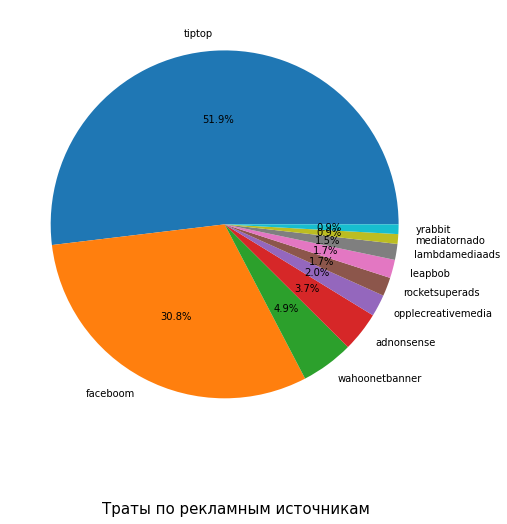

In [63]:
costs_by_channels = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

costs_by_channels['%'] = round(costs_by_channels['costs']/costs_by_channels['costs'].sum()*100, 2)

display(costs_by_channels)

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(costs_by_channels['costs'], labels=costs_by_channels.index, autopct='%1.1f%%', textprops={'fontsize':10})
plt.figtext(0.3, 0., "Траты по рекламным источникам", fontsize=15)
plt.show()

На рекламу в "tiptop" и "faceboom" вкладывают значительно больше денег, чем в рекламу на других ресурсах. Однако, как мы помним больше платящих пользователей привлекают "faceboom" и "adnonsense". Над кампаниями в "tiptop" было бы неплохо поработать.

**Сейчас буду строить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постараюсь отразить это на одном графике:**

In [64]:
costs['by_months'] = costs['dt'].astype('datetime64[M]') 
costs['by_weeks'] = costs['dt'].astype('datetime64[W]') 

In [65]:
display(costs.head(5))

dt   channel  costs  by_months   by_weeks
0  2019-05-01  faceboom  113.3 2019-05-01 2019-04-25
1  2019-05-02  faceboom   78.1 2019-05-01 2019-05-02
2  2019-05-03  faceboom   85.8 2019-05-01 2019-05-02
3  2019-05-04  faceboom  136.4 2019-05-01 2019-05-02
4  2019-05-05  faceboom  122.1 2019-05-01 2019-05-02

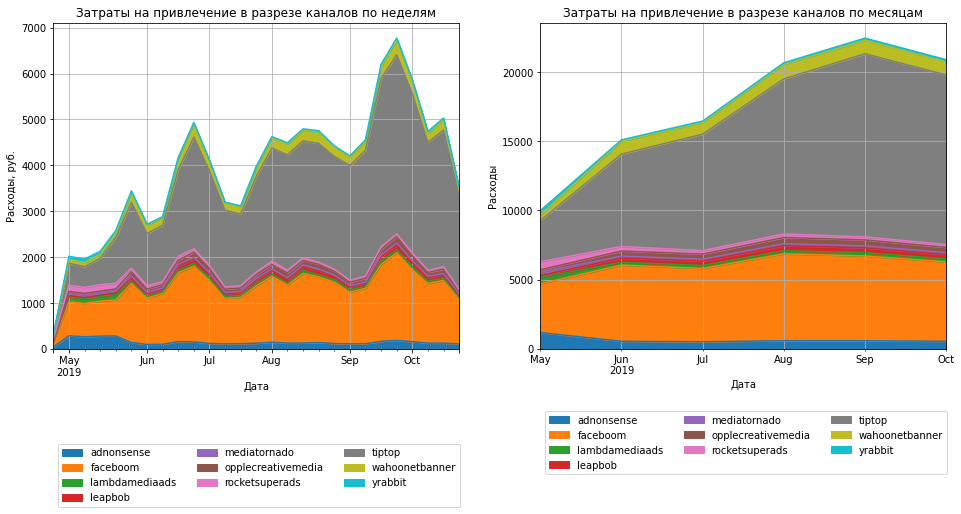

In [66]:
# ДИНАМИКА ЗАТРАТ по НЕДЕЛЯМ:
fig, ax = plt.subplots(1, 2, figsize=(16, 6)) # размер сетки для графиков



# ДИНАМИКА ЗАТРАТ по НЕДЕЛЯМ:

(costs
 .pivot_table(
    index=costs.by_weeks,
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot.area(ax=ax[0], grid=True)
)

ax[0].set_title('Затраты на привлечение в разрезе каналов по неделям', loc='center')
ax[0].set_ylabel('Расходы, руб.')
ax[0].set_xlabel('Дата')
ax[0].legend(ncol=3, bbox_to_anchor=(0, -0.5), loc='lower left')


# ДИНАМИКА ЗАТРАТ по месяцам:
(costs
 .pivot_table(
    index=costs.by_months,
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot.area(ax=ax[1], grid=True)
)


ax[1].set_title('Затраты на привлечение в разрезе каналов по месяцам', loc='center')
ax[1].set_ylabel('Расходы')
ax[1].set_xlabel('Дата')
ax[1].legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left')

ax[1].grid(b=True, which='minor', axis='both', linestyle='-')
ax[1].grid(b=True, which='major', axis='both', linestyle='-')
#plt.grid(b=True, which='minor', axis='both', linestyle='-')
#plt.grid(b=True, which='major', axis='both', linestyle='-') пытался принудительно горизонтальные линии добавить
plt.show()



На графиках выделяется рост расходов на кампании в сервисах "yrabbit", "wahoonetbanner" и "tiptop" по неделям до октября 2019 года, на пике они достигают примерно 6800, после чего расходы снижаются.  По месяцами виден рост до сентября 2019, на пике расходы составили более 20000, после чего так же заметен спад.

In [67]:
сosts_filtred = costs.query("channel != 'tiptop' and channel != 'faceboom'")

In [68]:
display(сosts_filtred['channel'].unique())

array(['mediatornado', 'rocketsuperads', 'yrabbit', 'adnonsense',
       'leapbob', 'opplecreativemedia', 'wahoonetbanner',
       'lambdamediaads'], dtype=object)

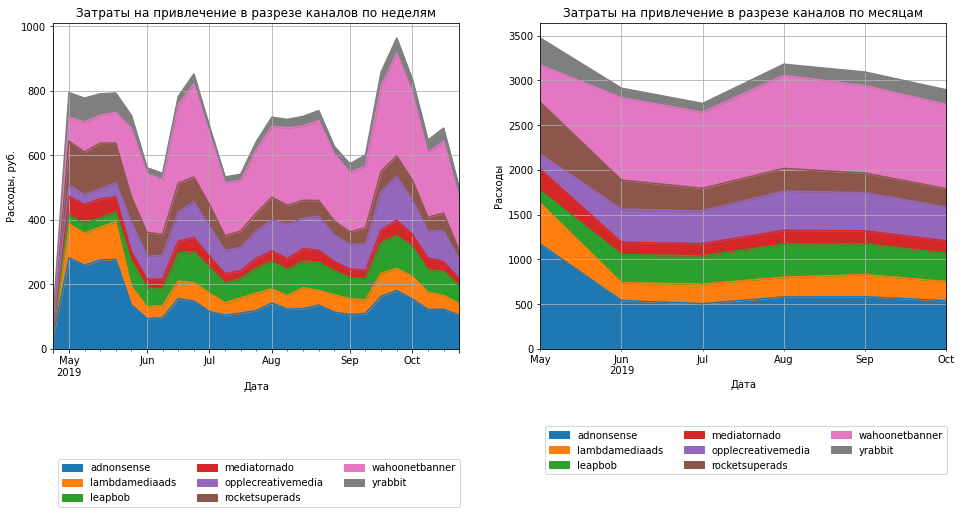

In [69]:
# ДИНАМИКА ЗАТРАТ по НЕДЕЛЯМ:
fig, ax = plt.subplots(1, 2, figsize=(16, 6)) # размер сетки для графиков



# ДИНАМИКА ЗАТРАТ по НЕДЕЛЯМ:

(сosts_filtred
 .pivot_table(
    index=costs.by_weeks,
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot.area(ax=ax[0], grid=True)
)

ax[0].set_title('Затраты на привлечение в разрезе каналов по неделям', loc='center')
ax[0].set_ylabel('Расходы, руб.')
ax[0].set_xlabel('Дата')
ax[0].legend(ncol=3, bbox_to_anchor=(0, -0.5), loc='lower left')


# ДИНАМИКА ЗАТРАТ по месяцам:
(сosts_filtred
 .pivot_table(
    index=costs.by_months,
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot.area(ax=ax[1], grid=True)
)


ax[1].set_title('Затраты на привлечение в разрезе каналов по месяцам', loc='center')
ax[1].set_ylabel('Расходы')
ax[1].set_xlabel('Дата')
ax[1].legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left')

ax[1].grid(b=True, which='minor', axis='both', linestyle='-')
ax[1].grid(b=True, which='major', axis='both', linestyle='-')
#plt.grid(b=True, which='minor', axis='both', linestyle='-')
#plt.grid(b=True, which='major', axis='both', linestyle='-') пытался принудительно горизонтальные линии добавить
plt.show()



In [70]:
display(profiles.head(5))

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    faceboom     mac  united_states   
1   4919697 2019-07-09 12:46:07    faceboom  iphone  united_states   
2   6085896 2019-10-01 09:58:33     organic  iphone         france   
3  22593348 2019-08-22 21:35:48  adnonsense      pc        germany   
4  31989216 2019-10-02 00:07:44     yrabbit  iphone  united_states   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

**Вычислим, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используем профили пользователей.
Напишем промежуточные выводы:**

* Выясним, как меняется стоимость привлечения для каждого источника от когорты к когорте. Для этого построим сводную таблицу, в которой названиями строк будут даты привлечения пользователей, названиями столбцов — каналы привлечения, а значениями — средний CAC, и построим по ней график истории изменений.

In [71]:
# Разбиваю по неделям и месяцам
profiles['by_months'] = profiles['dt'].astype('datetime64[M]') 
profiles['by_weeks'] = profiles['dt'].astype('datetime64[W]') 

In [72]:
display(profiles.head(5))

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    faceboom     mac  united_states   
1   4919697 2019-07-09 12:46:07    faceboom  iphone  united_states   
2   6085896 2019-10-01 09:58:33     organic  iphone         france   
3  22593348 2019-08-22 21:35:48  adnonsense      pc        germany   
4  31989216 2019-10-02 00:07:44     yrabbit  iphone  united_states   

           dt      month  payer  acquisition_cost  by_months   by_weeks  
0  2019-05-07 2019-05-01   True          1.088172 2019-05-01 2019-05-02  
1  2019-07-09 2019-07-01  False          1.107237 2019-07-01 2019-07-04  
2  2019-10-01 2019-10-01  False          0.000000 2019-10-01 2019-09-26  
3  2019-08-22 2019-08-01  False          0.988235 2019-08-01 2019-08-22  
4  2019-10-02 2019-10-01  False          0.230769 2019-10-01 2019-09-26

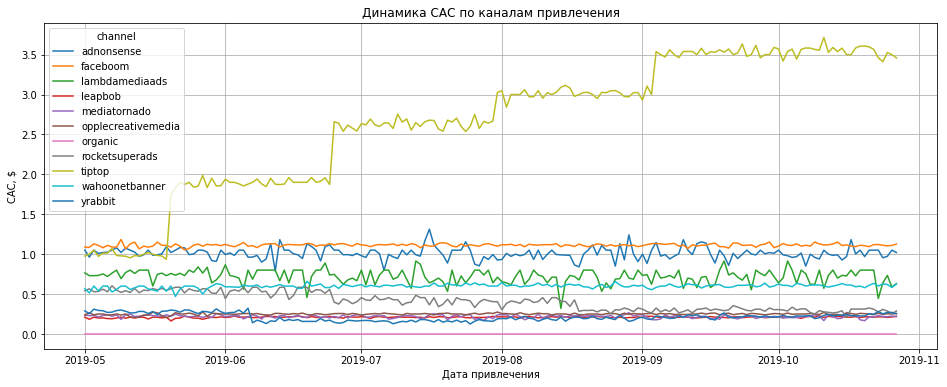

channel     adnonsense  faceboom  lambdamediaads  leapbob  mediatornado  \
dt                                                                        
2019-05-01    1.050000  1.089423        0.765217  0.21000      0.240000   
2019-05-02    0.962500  1.084722        0.730435  0.18375      0.229091   
2019-05-03    1.050000  1.128947        0.730435  0.21000      0.232000   
2019-05-04    1.008824  1.108943        0.733333  0.19950      0.212727   
2019-05-05    1.020833  1.080531        0.752941  0.20087      0.230000   

channel     opplecreativemedia  organic  rocketsuperads    tiptop  \
dt                                                                  
2019-05-01            0.236111      0.0        0.540000  0.975610   
2019-05-02            0.265625      0.0        0.565500  1.000000   
2019-05-03            0.239583      0.0        0.528387  1.049180   
2019-05-04            0.250000      0.0        0.531818  0.972222   
2019-05-05            0.250000      0.0        0.561122  1.012987   

channel     wahoonetbanner   yrabbit  
dt                                    
2019-05-01        0.568421  0.289286  
2019-05-02        0.514286  0.253846  
2019-05-03        0.600000  0.310345  
2019-05-04        0.540000  0.294340  
2019-05-05        0.600000  0.290909

In [73]:
# Строим график истории изменений CAC по каналам привлечения
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize = (16, 6))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

display(profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean').head(5));

На графике видно, что от месяца к месяцу стабильно повышаются расходы на привлечение пользователей по каналу "tiptop", с мая по июль примерно на 0,7 - 0,8$, с июля по сентябрь примерно на 0,5$.

In [74]:
# Считаем средний CAC по каналам привлечения

cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)

cac

cac
channel                     
adnonsense          1.008054
faceboom            1.113286
lambdamediaads      0.724802
leapbob             0.210172
mediatornado        0.218717
opplecreativemedia  0.250000
organic             0.000000
rocketsuperads      0.412095
tiptop              2.799003
wahoonetbanner      0.602245
yrabbit             0.218975

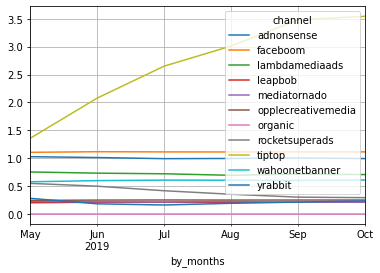

In [75]:
profiles.pivot_table(
    index='by_months', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True)

plt.grid(b=True, which='minor', axis='both', linestyle='-')
plt.grid(b=True, which='major', axis='both', linestyle='-')
plt.show()

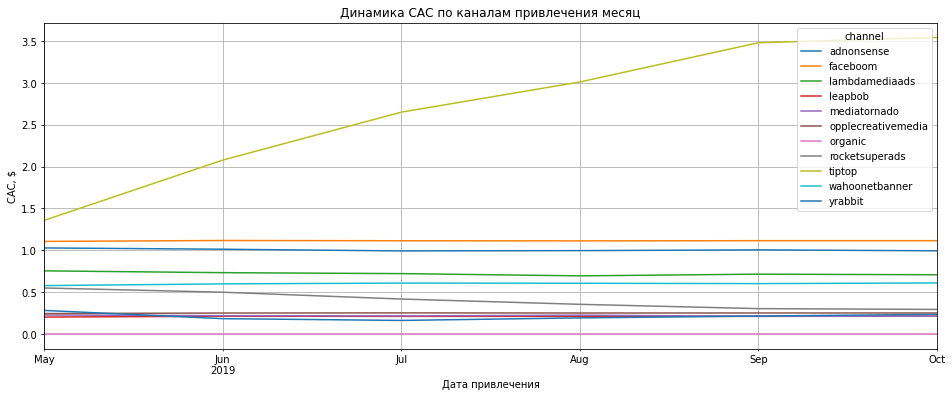

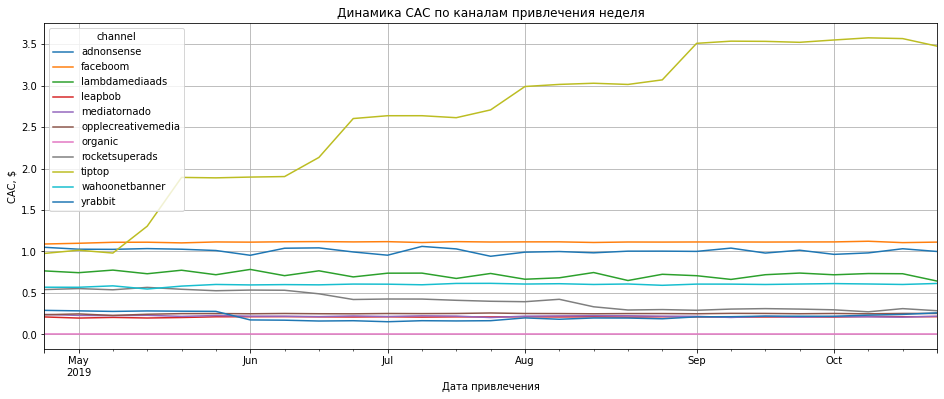

In [76]:
# Строим график истории изменений CAC по каналам привлечения
profiles.pivot_table(
    index='by_months', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize = (16, 6))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения месяц')
plt.grid(b=True, which='minor', axis='both', linestyle='-')
plt.grid(b=True, which='major', axis='both', linestyle='-')
plt.show()

profiles.pivot_table(
    index='by_weeks', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize = (16, 6))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения неделя')
plt.show()


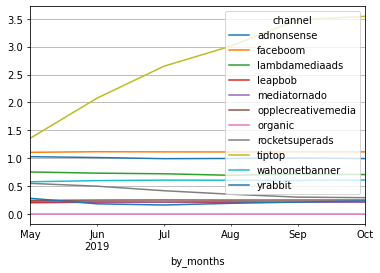

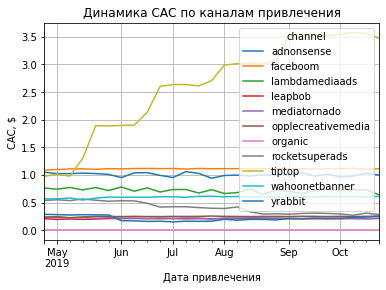

In [77]:
# Строим график истории изменений CAC по каналам привлечения

columns = ['by_months', 'by_weeks']

for i, col in enumerate(columns):
    profiles.pivot_table(
    index=col, columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True)

    
    
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')

#ax[1].grid(b=True, which='minor', axis='both', linestyle='-')
#ax[1].grid(b=True, which='major', axis='both', linestyle='-')

#plt.grid(b=True, which='minor', axis='both', linestyle='-')
#plt.grid(b=True, which='major', axis='both', linestyle='-')

plt.show();

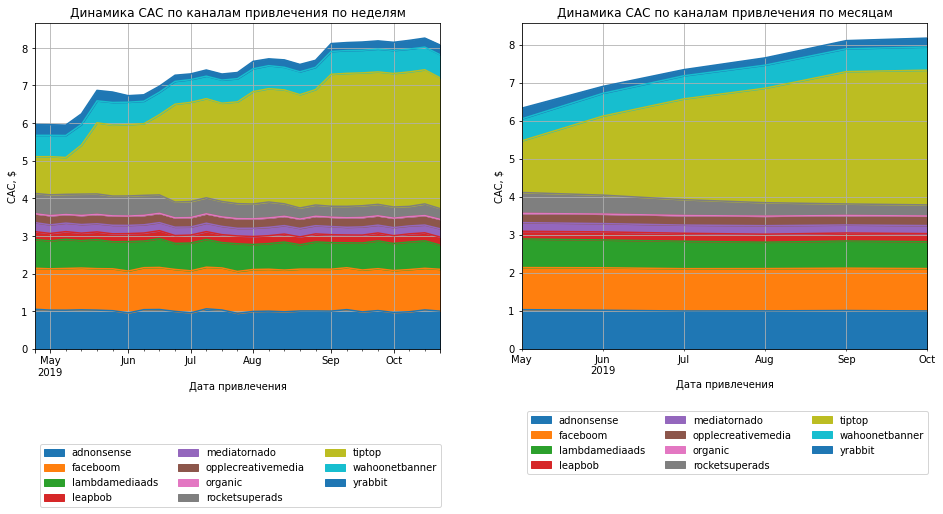

In [78]:
# Графики истории изменений CAC по каналам привлечения:
fig, ax = plt.subplots(1, 2, figsize=(16, 6)) # размер сетки для графиков



# График изменений CAC по НЕДЕЛЯМ:

(profiles.pivot_table(
    index='by_weeks', columns='channel', values='acquisition_cost', aggfunc='mean'
)
 .plot.area(ax=ax[0], grid=True)
)

ax[0].set_title('Динамика САС по каналам привлечения по неделям')
ax[0].set_ylabel('CAC, $')
ax[0].set_xlabel('Дата привлечения')
ax[0].legend(ncol=3, bbox_to_anchor=(0, -0.5), loc='lower left')


# График изменений CAC по месяцам:
(profiles.pivot_table(
    index='by_months', columns='channel', values='acquisition_cost', aggfunc='mean'
)
 .plot.area(ax=ax[1], grid=True)
)


ax[1].set_title('Динамика САС по каналам привлечения по месяцам')
ax[1].set_ylabel('CAC, $')
ax[1].set_xlabel('Дата привлечения')
ax[1].legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left')

ax[1].grid(b=True, which='minor', axis='both', linestyle='-')
ax[1].grid(b=True, which='major', axis='both', linestyle='-')
#plt.grid(b=True, which='minor', axis='both', linestyle='-')
#plt.grid(b=True, which='major', axis='both', linestyle='-') пытался принудительно горизонтальные линии добавить
plt.show()



Графики в разбивке по неделям показывают вывод, привёдённый выше.

### Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишем вывод, опишем возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI:**

cohort_size    0         1         2         3         4  \
payer device                                                              
False android        18988  1.0  0.174953  0.086476  0.051928  0.031336   
      iphone         29276  1.0  0.178098  0.086829  0.052774  0.034533   
      mac            16150  1.0  0.179195  0.085635  0.049412  0.033065   
      pc             16920  1.0  0.174704  0.087234  0.052364  0.034574   
True  android         1695  1.0  0.384661  0.298525  0.250147  0.214159   

                      5         6         7         8         9        10  \
payer device                                                                
False android  0.024015  0.017485  0.013798  0.011060  0.010006  0.007742   
      iphone   0.025857  0.019436  0.014039  0.011921  0.009940  0.007310   
      mac      0.023901  0.019505  0.014551  0.012755  0.009102  0.007988   
      pc       0.024232  0.017790  0.014539  0.011170  0.008747  0.007033   
True  android  0.206490  0.156342  0.166372  0.146903  0.137463  0.132743   

                     11        12        13  
payer device                                 
False android  0.006530  0.005477  0.005056  
      iphone   0.006832  0.006319  0.004372  
      mac      0.006440  0.006254  0.004025  
      pc       0.005437  0.005851  0.005556  
True  android  0.110914  0.128614  0.107375

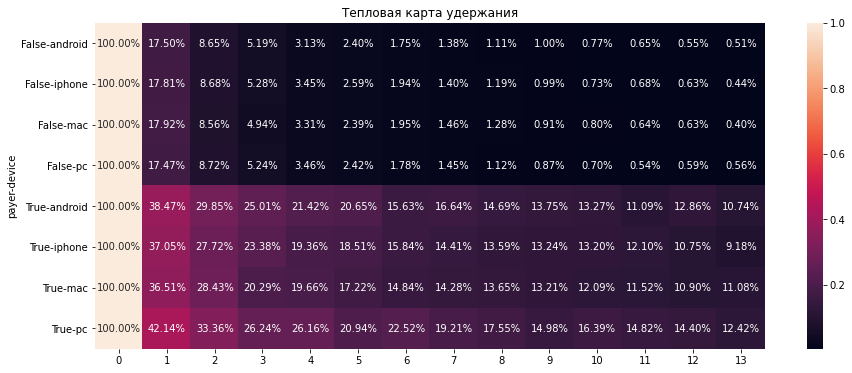

In [79]:
retention_raw, retention, retention_history = get_retention(
    profiles_filtred, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)


display(retention.head(5));

# строим хитмэп с учётом горизонта анализа

plt.figure(figsize = (15, 6))  # задаём размер графика
sns.heatmap(retention.drop(columns = ['cohort_size']), # удаляем размеры когорт
            annot = True,  # включаем подписи
            fmt = '.2%'  # отображаем значения в виде процентов
           )
plt.title('Тепловая карта удержания')  # название графика
plt.show()

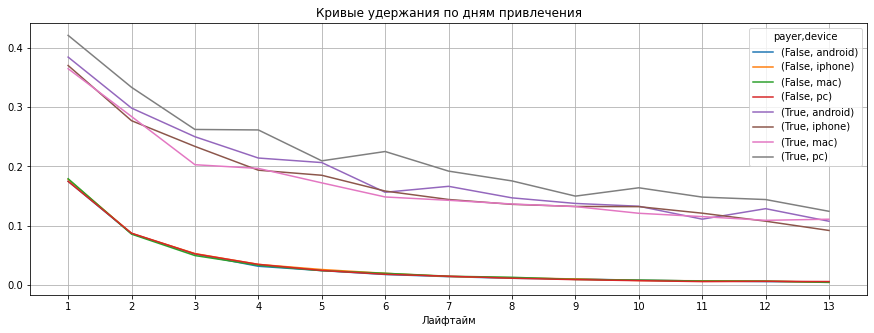

In [80]:
# Строим кривые удержания

report = retention.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения')  # название графика
plt.show()

На графике видно как отличается удержание платящих и неплатящих пользователей. У платящих пользователей оно выше, чем у неплатящих. Среди платящих пользователй самое высокое удержание у пользователей PC. Удержание неплатящих пользователей одинаково для всех платформ.

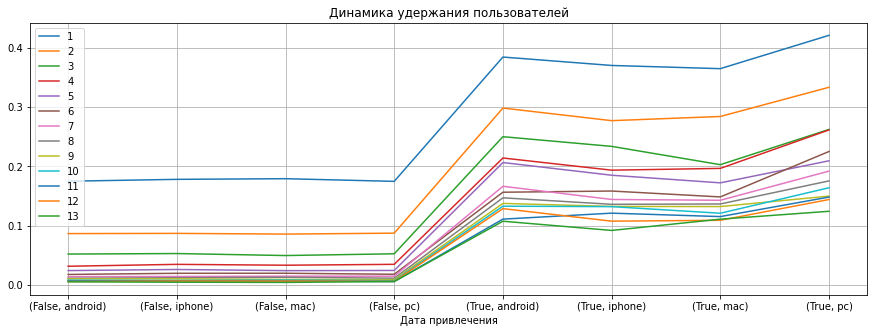

In [81]:
# Строим графики изменений

report = retention.drop(columns=['cohort_size', 0])

report.plot(grid=True, figsize=(15, 5))
plt.xlabel('Дата привлечения')
plt.title('Динамика удержания пользователей')
plt.show()

Каждая линия на этом графике показывает, как менялось удержание пользователей на определённый лайфтайм. Например, синяя линия сверху отражает изменения в удержании второго дня, или первого лайфтайма, а нижняя зелёная — в удержании четырнадцатого дня.

Как видно по графику удержание неплатящих пользователей не меняется, а удержание платящих постепенно растёт.

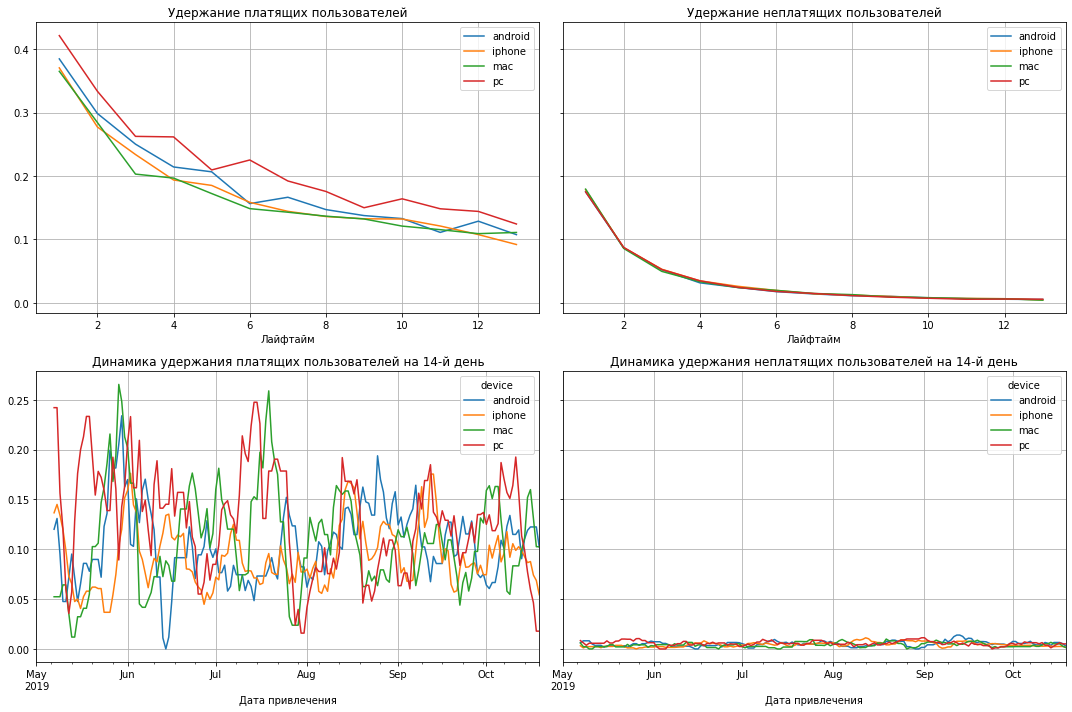

In [82]:
plot_retention(retention, retention_history, 14)

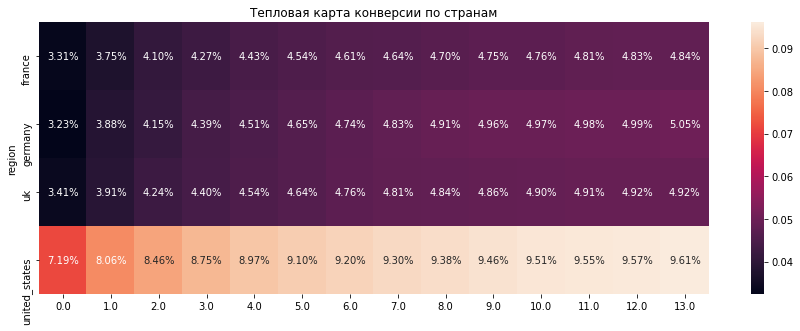

In [83]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_filtred, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по странам')
plt.show() 

Ожидаемо выше конверсия в США, на втором месте конверсия в Германии. Следом по порядку Великобритания и Франция.

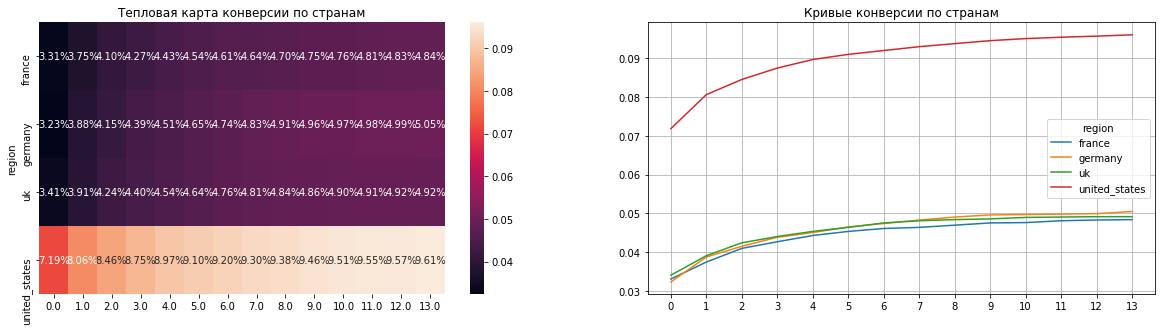

In [84]:
plt.figure(figsize = (20, 5)) # задаём размер «подложки»

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по странам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по странам')

plt.show() 

Кривые конверсии подтверждают вывод, сделанный по тепловой карте.

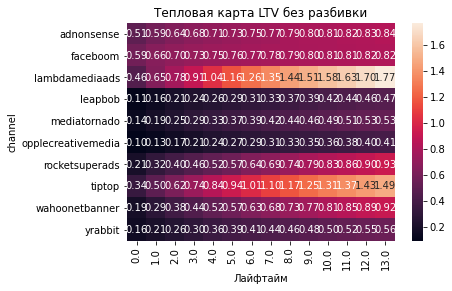

In [85]:
# рассчитываем LTV и ROI

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_filtred, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

In [86]:
display(roi);  # таблица ROI

cohort_size       cac       0.0       1.0       2.0  \
channel                                                                   
adnonsense                 3702  1.008023  0.501010  0.584460  0.639288   
faceboom                  27544  1.113419  0.526040  0.593510  0.629343   
lambdamediaads             2056  0.727237  0.632899  0.887333  1.070887   
leapbob                    8103  0.210000  0.509752  0.741436  0.978967   
mediatornado               4167  0.219035  0.627684  0.874814  1.127410   
opplecreativemedia         8139  0.249908  0.389100  0.526504  0.686996   
rocketsuperads             4251  0.417431  0.497256  0.763336  0.948932   
tiptop                    18498  2.757774  0.124575  0.180359  0.226321   
wahoonetbanner             8082  0.601856  0.317853  0.484298  0.629588   
yrabbit                    4102  0.217087  0.752238  0.983122  1.179250   

                         3.0       4.0       5.0       6.0       7.0  \
channel                                                                
adnonsense          0.678069  0.701069  0.726752  0.748147  0.761519   
faceboom            0.654599  0.671035  0.682914  0.695801  0.704818   
lambdamediaads      1.245178  1.432136  1.595673  1.735841  1.859323   
leapbob             1.120908  1.236450  1.374282  1.498034  1.589535   
mediatornado        1.340729  1.516873  1.675432  1.773841  1.910531   
opplecreativemedia  0.826849  0.964769  1.065354  1.161037  1.238564   
rocketsuperads      1.092347  1.235204  1.367935  1.531090  1.646391   
tiptop              0.268272  0.305449  0.339298  0.367570  0.397585   
wahoonetbanner      0.737309  0.858780  0.946188  1.049868  1.126808   
yrabbit             1.400049  1.641119  1.786814  1.910094  2.022179   

                         8.0       9.0      10.0      11.0      12.0      13.0  
channel                                                                         
adnonsense          0.782922  0.796294  0.800573  0.808597  0.820631  0.831337  
faceboom            0.711685  0.719204  0.724119  0.729488  0.734210  0.737790  
lambdamediaads      1.986818  2.070251  2.171709  2.241794  2.331922  2.428712  
leapbob             1.759730  1.877030  1.988470  2.085248  2.179087  2.252399  
mediatornado        2.008962  2.107371  2.216726  2.320602  2.402610  2.436519  
opplecreativemedia  1.314661  1.388265  1.457448  1.507006  1.580649  1.637075  
rocketsuperads      1.767923  1.892809  1.991795  2.070538  2.152657  2.237019  
tiptop              0.424763  0.451627  0.475535  0.497310  0.517679  0.539532  
wahoonetbanner      1.205193  1.271878  1.350049  1.411192  1.477881  1.526304  
yrabbit             2.123045  2.212703  2.313569  2.414457  2.516446  2.578086

**Определяем из каких стран приходят пользователи и какая страна дает больше всех платящих пользователей:**

In [87]:
# Определяем из каких стран приходят пользователи и какая страна дает больше всех платящих пользователей
profiles_region = profiles_filtred.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'})\
                  .sort_values(by='user_id', ascending=False)
profiles_region

user_id  payer
region                       
united_states    61829   6108
uk               11154    569
france           11058    554
germany           9528    490

**Строим таблицу, отражающую количество пользователей и долю платящих из каждой страны:**

In [88]:
# строим таблицу, отражающую количество пользователей и долю платящих из каждой страны
profiles_region['fraction'] = profiles_region['payer'] / profiles_region['user_id'] * 100
profiles_region.sort_values(by='fraction', ascending=False)

user_id  payer  fraction
region                                 
united_states    61829   6108  9.878859
germany           9528    490  5.142737
uk               11154    569  5.101309
france           11058    554  5.009948

**Рассчитываем ROI**

Разделив LTV на CAC, получим ROI — возврат на инвестиции. Однако есть тонкость: при расчёте CAC важно учитывать момент и горизонт анализа из расчёта LTV.

Чтобы вычислить ROI по каждому каналу привлечения, сначала найдём «пожизненную ценность» пользователей «Читать не вредно» с разбивкой по каналам привлечения.

cohort_size       0.0       1.0       2.0       3.0  \
channel                                                                   
adnonsense                 3702  0.505030  0.589149  0.644417  0.683509   
faceboom                  27544  0.585703  0.660825  0.700722  0.728842   
lambdamediaads             2056  0.460268  0.645302  0.778789  0.905540   
leapbob                    8103  0.107048  0.155702  0.205583  0.235391   
mediatornado               4167  0.137485  0.191615  0.246943  0.293667   
opplecreativemedia         8139  0.097239  0.131578  0.171686  0.206636   
rocketsuperads             4251  0.207570  0.318640  0.396114  0.455980   
tiptop                    18498  0.343550  0.497389  0.624141  0.739834   
wahoonetbanner             8082  0.191302  0.291477  0.378921  0.443754   
yrabbit                    4102  0.163301  0.213423  0.256000  0.303932   

                         4.0       5.0       6.0       7.0       8.0  \
channel                                                                
adnonsense          0.706694  0.732582  0.754149  0.767628  0.789203   
faceboom            0.747143  0.760369  0.774718  0.784757  0.792404   
lambdamediaads      1.041503  1.160433  1.262369  1.352169  1.444888   
leapbob             0.259654  0.288599  0.314587  0.333802  0.369543   
mediatornado        0.332249  0.366979  0.388534  0.418474  0.440034   
opplecreativemedia  0.241103  0.266240  0.290152  0.309527  0.328544   
rocketsuperads      0.515613  0.571019  0.639125  0.687255  0.737986   
tiptop              0.842358  0.935707  1.013676  1.096450  1.171400   
wahoonetbanner      0.516862  0.569469  0.631870  0.678176  0.725353   
yrabbit             0.356265  0.387894  0.414656  0.438988  0.460885   

                         9.0      10.0      11.0      12.0      13.0  
channel                                                               
adnonsense          0.802682  0.806996  0.815084  0.827215  0.838006  
faceboom            0.800775  0.806247  0.812226  0.817483  0.821469  
lambdamediaads      1.505564  1.579348  1.630316  1.695861  1.766250  
leapbob             0.394176  0.417579  0.437902  0.457608  0.473004  
mediatornado        0.461589  0.485541  0.508294  0.526256  0.533684  
opplecreativemedia  0.346938  0.364228  0.376613  0.395017  0.409118  
rocketsuperads      0.790118  0.831437  0.864307  0.898586  0.933801  
tiptop              1.245485  1.311417  1.371467  1.427640  1.487908  
wahoonetbanner      0.765488  0.812535  0.849334  0.889472  0.918615  
yrabbit             0.480349  0.502245  0.524147  0.546287  0.559668

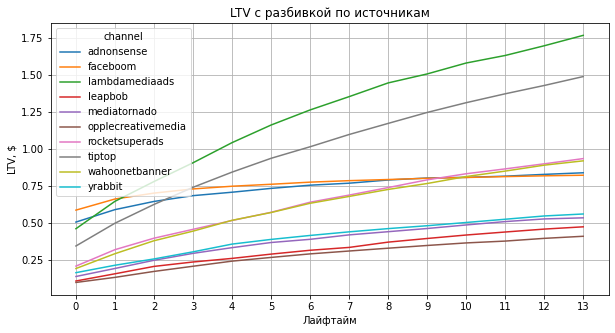

In [89]:
# Находим LTV с разбивкой по каналам привлечения
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtred, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

# Таблица LTV
display(ltv)

# Кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по источникам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

Показатели LTV выше у ресурсов "lambdamediaads" и "tiptop" и они сильно отличаются в лучшую сторону от других ресурсов.

**Отфильтруем пользовательские профили методом query(): возьмём лишь те, что участвуют в расчёте LTV. Результат сохраним в новой переменной — ltv_profiles.**

In [90]:
# Находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# Отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles_filtred.query('dt <= @max_acquitision_dt')

# Оставшееся число пользователей на каждый лайфтайм
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})

user_id
dt                 
2019-05-01      390
2019-05-02      323
2019-05-03      346
2019-05-04      457
2019-05-05      438
...             ...
2019-10-15      442
2019-10-16      436
2019-10-17      449
2019-10-18      591
2019-10-19      588

[172 rows x 1 columns]

**Рассчитаем средний CAC по каждому каналу привлечения. Для этого сгруппируем отфильтрованные профили и применим функцию mean() к значениям столбца acquisition_cost. Сохраним результат в переменную cac, изменив название столбца acquisition_cost на cac.**

In [91]:
# Считаем средний CAC по каналам привлечения
cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)

cac

cac
channel                     
adnonsense          1.008023
faceboom            1.113419
lambdamediaads      0.727237
leapbob             0.210000
mediatornado        0.219035
opplecreativemedia  0.249908
rocketsuperads      0.417431
tiptop              2.757774
wahoonetbanner      0.601856
yrabbit             0.217087

**С предварительными расчётами всё — можно считать ROI. Разделим каждую ячейку из таблицы LTV на соответствующую ячейку в столбце cac из таблицы CAC, вызвав метод div() и передав параметру axis значение 0.**

In [92]:
roi = ltv.div(cac['cac'], axis=0)
roi

cohort_size       0.0       1.0       2.0       3.0  \
channel                                                                    
adnonsense           3672.536378  0.501010  0.584460  0.639288  0.678069   
faceboom            24738.226686  0.526040  0.593510  0.629343  0.654599   
lambdamediaads       2827.137507  0.632899  0.887333  1.070887  1.245178   
leapbob             38585.714286  0.509752  0.741436  0.978967  1.120908   
mediatornado        19024.332764  0.627684  0.874814  1.127410  1.340729   
opplecreativemedia  32568.004425  0.389100  0.526504  0.686996  0.826849   
rocketsuperads      10183.714286  0.497256  0.763336  0.948932  1.092347   
tiptop               6707.584179  0.124575  0.180359  0.226321  0.268272   
wahoonetbanner      13428.461823  0.317853  0.484298  0.629588  0.737309   
yrabbit             18895.668677  0.752238  0.983122  1.179250  1.400049   

                         4.0       5.0       6.0       7.0       8.0  \
channel                                                                
adnonsense          0.701069  0.726752  0.748147  0.761519  0.782922   
faceboom            0.671035  0.682914  0.695801  0.704818  0.711685   
lambdamediaads      1.432136  1.595673  1.735841  1.859323  1.986818   
leapbob             1.236450  1.374282  1.498034  1.589535  1.759730   
mediatornado        1.516873  1.675432  1.773841  1.910531  2.008962   
opplecreativemedia  0.964769  1.065354  1.161037  1.238564  1.314661   
rocketsuperads      1.235204  1.367935  1.531090  1.646391  1.767923   
tiptop              0.305449  0.339298  0.367570  0.397585  0.424763   
wahoonetbanner      0.858780  0.946188  1.049868  1.126808  1.205193   
yrabbit             1.641119  1.786814  1.910094  2.022179  2.123045   

                         9.0      10.0      11.0      12.0      13.0  
channel                                                               
adnonsense          0.796294  0.800573  0.808597  0.820631  0.831337  
faceboom            0.719204  0.724119  0.729488  0.734210  0.737790  
lambdamediaads      2.070251  2.171709  2.241794  2.331922  2.428712  
leapbob             1.877030  1.988470  2.085248  2.179087  2.252399  
mediatornado        2.107371  2.216726  2.320602  2.402610  2.436519  
opplecreativemedia  1.388265  1.457448  1.507006  1.580649  1.637075  
rocketsuperads      1.892809  1.991795  2.070538  2.152657  2.237019  
tiptop              0.451627  0.475535  0.497310  0.517679  0.539532  
wahoonetbanner      1.271878  1.350049  1.411192  1.477881  1.526304  
yrabbit             2.212703  2.313569  2.414457  2.516446  2.578086

**Затраты на привлечение органических пользователей нулевые, поэтому они всегда окупаются. А раз так, исключим их — удалим из результата все строки, в которых размер когорты равен бесконечности, применяя метод isin() и оператор ~. Сравнивать значения с бесконечностью в Python позволяет переменная inf из библиотеки numpy.**

In [93]:
roi = roi[~roi['cohort_size'].isin([np.inf])]
roi

cohort_size       0.0       1.0       2.0       3.0  \
channel                                                                    
adnonsense           3672.536378  0.501010  0.584460  0.639288  0.678069   
faceboom            24738.226686  0.526040  0.593510  0.629343  0.654599   
lambdamediaads       2827.137507  0.632899  0.887333  1.070887  1.245178   
leapbob             38585.714286  0.509752  0.741436  0.978967  1.120908   
mediatornado        19024.332764  0.627684  0.874814  1.127410  1.340729   
opplecreativemedia  32568.004425  0.389100  0.526504  0.686996  0.826849   
rocketsuperads      10183.714286  0.497256  0.763336  0.948932  1.092347   
tiptop               6707.584179  0.124575  0.180359  0.226321  0.268272   
wahoonetbanner      13428.461823  0.317853  0.484298  0.629588  0.737309   
yrabbit             18895.668677  0.752238  0.983122  1.179250  1.400049   

                         4.0       5.0       6.0       7.0       8.0  \
channel                                                                
adnonsense          0.701069  0.726752  0.748147  0.761519  0.782922   
faceboom            0.671035  0.682914  0.695801  0.704818  0.711685   
lambdamediaads      1.432136  1.595673  1.735841  1.859323  1.986818   
leapbob             1.236450  1.374282  1.498034  1.589535  1.759730   
mediatornado        1.516873  1.675432  1.773841  1.910531  2.008962   
opplecreativemedia  0.964769  1.065354  1.161037  1.238564  1.314661   
rocketsuperads      1.235204  1.367935  1.531090  1.646391  1.767923   
tiptop              0.305449  0.339298  0.367570  0.397585  0.424763   
wahoonetbanner      0.858780  0.946188  1.049868  1.126808  1.205193   
yrabbit             1.641119  1.786814  1.910094  2.022179  2.123045   

                         9.0      10.0      11.0      12.0      13.0  
channel                                                               
adnonsense          0.796294  0.800573  0.808597  0.820631  0.831337  
faceboom            0.719204  0.724119  0.729488  0.734210  0.737790  
lambdamediaads      2.070251  2.171709  2.241794  2.331922  2.428712  
leapbob             1.877030  1.988470  2.085248  2.179087  2.252399  
mediatornado        2.107371  2.216726  2.320602  2.402610  2.436519  
opplecreativemedia  1.388265  1.457448  1.507006  1.580649  1.637075  
rocketsuperads      1.892809  1.991795  2.070538  2.152657  2.237019  
tiptop              0.451627  0.475535  0.497310  0.517679  0.539532  
wahoonetbanner      1.271878  1.350049  1.411192  1.477881  1.526304  
yrabbit             2.212703  2.313569  2.414457  2.516446  2.578086

**Восстановим столбец с размерами когорт после деления на CAC.**

In [94]:
roi.loc[:, 'cohort_size'] = ltv['cohort_size']
display(roi);

cohort_size       0.0       1.0       2.0       3.0  \
channel                                                                   
adnonsense                 3702  0.501010  0.584460  0.639288  0.678069   
faceboom                  27544  0.526040  0.593510  0.629343  0.654599   
lambdamediaads             2056  0.632899  0.887333  1.070887  1.245178   
leapbob                    8103  0.509752  0.741436  0.978967  1.120908   
mediatornado               4167  0.627684  0.874814  1.127410  1.340729   
opplecreativemedia         8139  0.389100  0.526504  0.686996  0.826849   
rocketsuperads             4251  0.497256  0.763336  0.948932  1.092347   
tiptop                    18498  0.124575  0.180359  0.226321  0.268272   
wahoonetbanner             8082  0.317853  0.484298  0.629588  0.737309   
yrabbit                    4102  0.752238  0.983122  1.179250  1.400049   

                         4.0       5.0       6.0       7.0       8.0  \
channel                                                                
adnonsense          0.701069  0.726752  0.748147  0.761519  0.782922   
faceboom            0.671035  0.682914  0.695801  0.704818  0.711685   
lambdamediaads      1.432136  1.595673  1.735841  1.859323  1.986818   
leapbob             1.236450  1.374282  1.498034  1.589535  1.759730   
mediatornado        1.516873  1.675432  1.773841  1.910531  2.008962   
opplecreativemedia  0.964769  1.065354  1.161037  1.238564  1.314661   
rocketsuperads      1.235204  1.367935  1.531090  1.646391  1.767923   
tiptop              0.305449  0.339298  0.367570  0.397585  0.424763   
wahoonetbanner      0.858780  0.946188  1.049868  1.126808  1.205193   
yrabbit             1.641119  1.786814  1.910094  2.022179  2.123045   

                         9.0      10.0      11.0      12.0      13.0  
channel                                                               
adnonsense          0.796294  0.800573  0.808597  0.820631  0.831337  
faceboom            0.719204  0.724119  0.729488  0.734210  0.737790  
lambdamediaads      2.070251  2.171709  2.241794  2.331922  2.428712  
leapbob             1.877030  1.988470  2.085248  2.179087  2.252399  
mediatornado        2.107371  2.216726  2.320602  2.402610  2.436519  
opplecreativemedia  1.388265  1.457448  1.507006  1.580649  1.637075  
rocketsuperads      1.892809  1.991795  2.070538  2.152657  2.237019  
tiptop              0.451627  0.475535  0.497310  0.517679  0.539532  
wahoonetbanner      1.271878  1.350049  1.411192  1.477881  1.526304  
yrabbit             2.212703  2.313569  2.414457  2.516446  2.578086

Таблица ROI готова. Построим кривые ROI и добавим на график уровень окупаемости, вызвав функцию axhline() из библиотеки matplotlib.

Её параметры:

y — координата линии по вертикальной оси,
color — цвет линии,
linestyle — стиль линии,
label — подпись.
Уровень окупаемости установим на уровне 1, линию сделаем красной (color='red') и пунктирной (linestyle='--'). Чтобы добавить её в легенду, вызовем метод legend() библиотеки matplotlib.

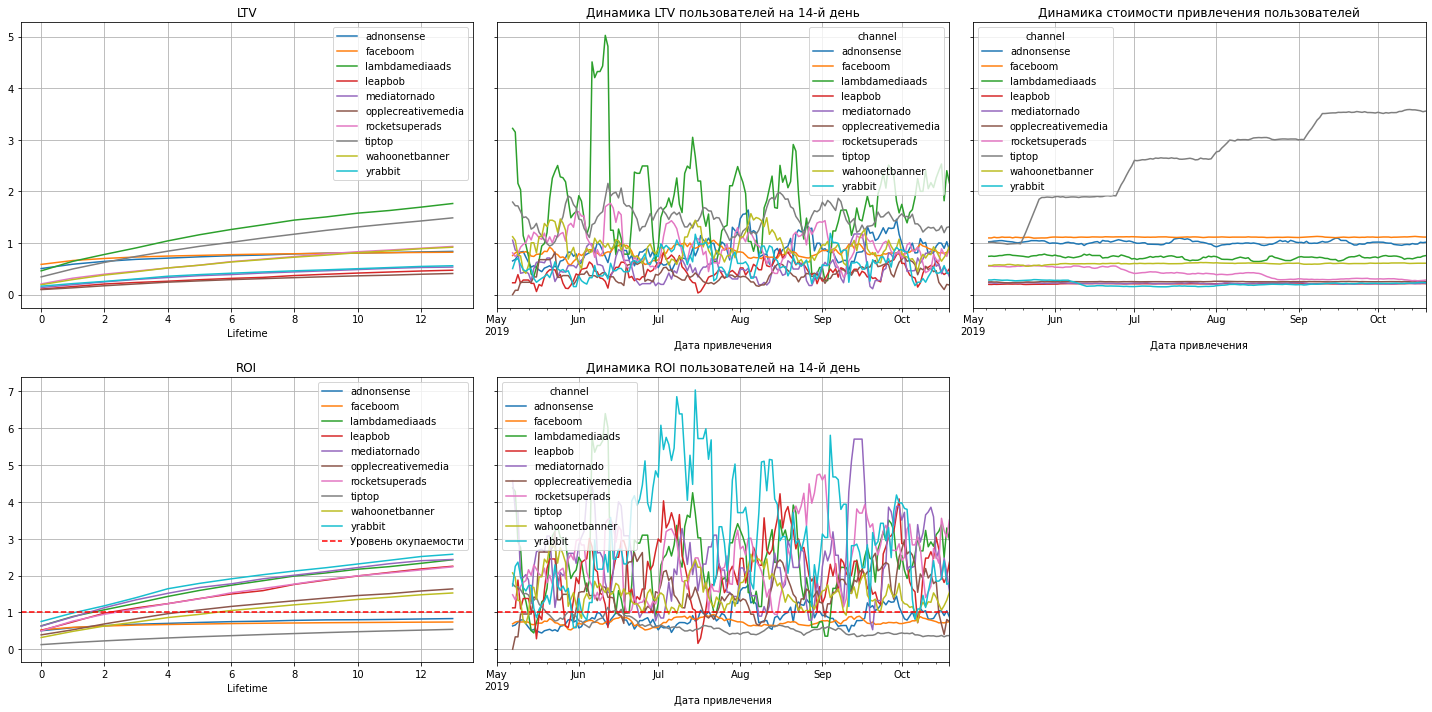

In [95]:
#строим графики

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14)

* По каналу LTV отличаются пользователи, привлечённые теми же "lambdamediaads" и "tiptop". В среднем показатели стабильно растут по всем каналам.

* По каналу CAC заметно выделяется резкое увеличение стоимости привлечения пользователей из канала "tiptop". По остальным каналам сильных изменений не заметно.

* ROI будет разоюрано ниже отдельно.

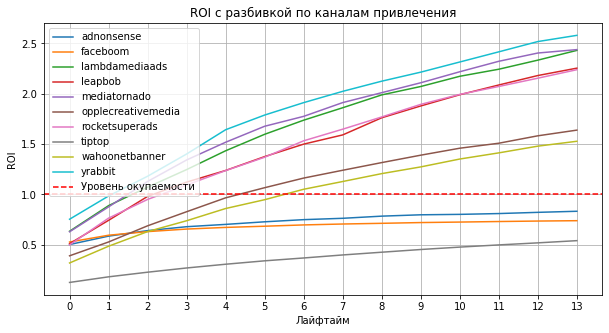

In [96]:
report = roi.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))

plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

Судя по графику реклама окупается по всем каналам кроме:

* tiptop
* faceboom
* adnosense

Причём из них хуже всего окупается реклама в tiptop, а на привлечение пользователей из этого канала выделяется больше всего средств.

**Анализ по регионам привлечения:**

**Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI:**

cohort_size    0         1         2         3         4  \
payer region                                                                    
False france                9993  1.0  0.173021  0.091164  0.052036  0.033724   
      germany               8563  1.0  0.176690  0.084900  0.056172  0.035034   
      uk                   10002  1.0  0.179064  0.088582  0.051390  0.031994   
      united_states        52776  1.0  0.177221  0.085626  0.051160  0.033500   
True  france                 523  1.0  0.474187  0.386233  0.323136  0.307839   

                            5         6         7         8         9  \
payer region                                                            
False france         0.022616  0.018213  0.014610  0.012108  0.010607   
      germany        0.025225  0.019503  0.014014  0.010510  0.009926   
      uk             0.024595  0.017696  0.015897  0.011598  0.008498   
      united_states  0.025030  0.018777  0.013813  0.011880  0.009474   
True  france         0.296367  0.246654  0.239006  0.223709  0.204589   

                           10        11        12        13  
payer region                                                 
False france         0.007805  0.006304  0.005304  0.005504  
      germany        0.007007  0.005722  0.006890  0.006540  
      uk             0.007299  0.006899  0.006399  0.004499  
      united_states  0.007541  0.006423  0.005931  0.004301  
True  france         0.210325  0.168260  0.189293  0.173996

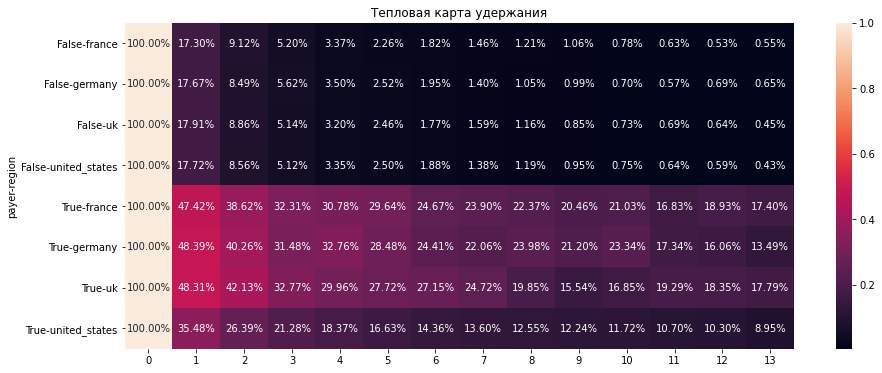

In [97]:
retention_raw, retention, retention_history = get_retention(
    profiles_filtred, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)


display(retention.head(5));

# Строим хитмэп с учётом горизонта анализа

plt.figure(figsize = (15, 6))  # задаём размер графика
sns.heatmap(retention.drop(columns = ['cohort_size']), # удаляем размеры когорт
            annot = True,  # включаем подписи
            fmt = '.2%'  # отображаем значения в виде процентов
           )
plt.title('Тепловая карта удержания')  # название графика
plt.show()

На тепловой карте мы видим ожидаемо низкую картину удержания неплатящих пользователей, заметной разницы по удержанию между неплатящими пользователями из различных стран не видно.

Среди платящих пользователей более высоким удержанием характеризуются пользователи из Великобритании - их удержание выше удержания пользователей из других стран на протяжении двух недель. 

Самым низким удержанием отличаются пользователи пришедшие из США - их удержание значительно ниже, чем у пользователей из других регионов, на протяжении всего двухнедельного срока.

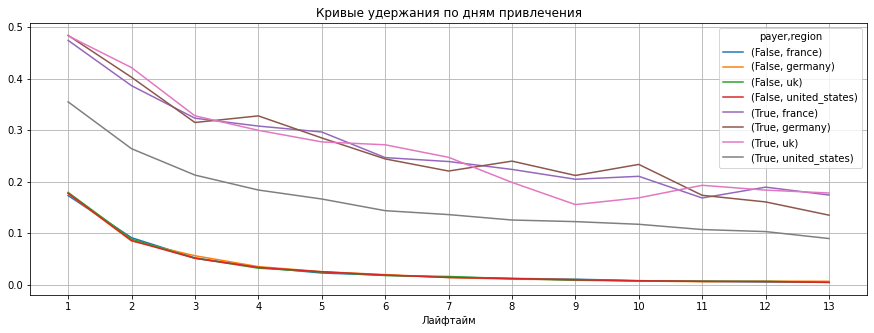

In [98]:
# Строим кривые удержания

report = retention.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения')  # название графика
plt.show()

Кривые удержания подтверждают выводы, сделанные по тепловой карте выше. Великобритания, Франция и Германия показывают примерно одинаковую динамику удержания пользователей, а график удержания пользователей из США ниже чем графики удержания пользователей из других регионов.

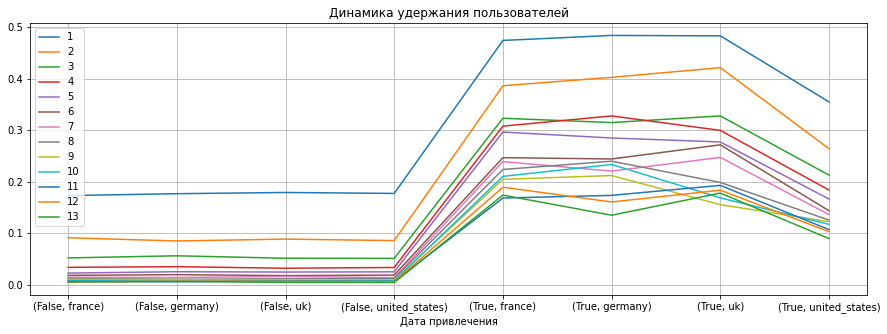

In [99]:
# Строим графики изменений

report = retention.drop(columns=['cohort_size', 0])

report.plot(grid=True, figsize=(15, 5))
plt.xlabel('Дата привлечения')
plt.title('Динамика удержания пользователей')
plt.show()

По графику динамики удержания так же можно сказать, что удержание пользователей из США ниже удержания пользователей из других регионов по каждому из дней исследования.

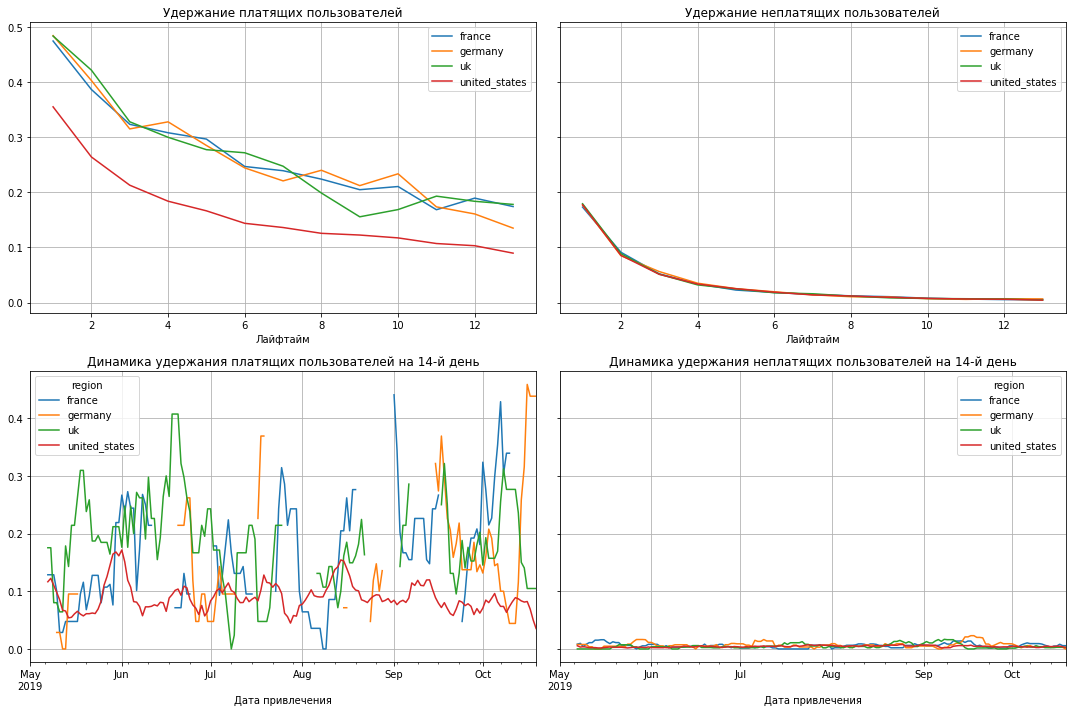

In [100]:
plot_retention(retention, retention_history, 14)

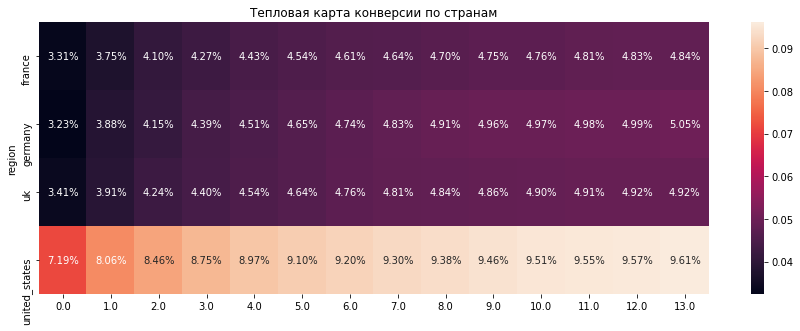

In [101]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_filtred, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

# Строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по странам')
plt.show() 

На этой тепловой карте сразу бросается в глаза то, что конверсия пользователей из США выше конверсии пользователей из других регионов. Конверсия пользователей из Франции, германии и Великобритании примерно на одном уровне.

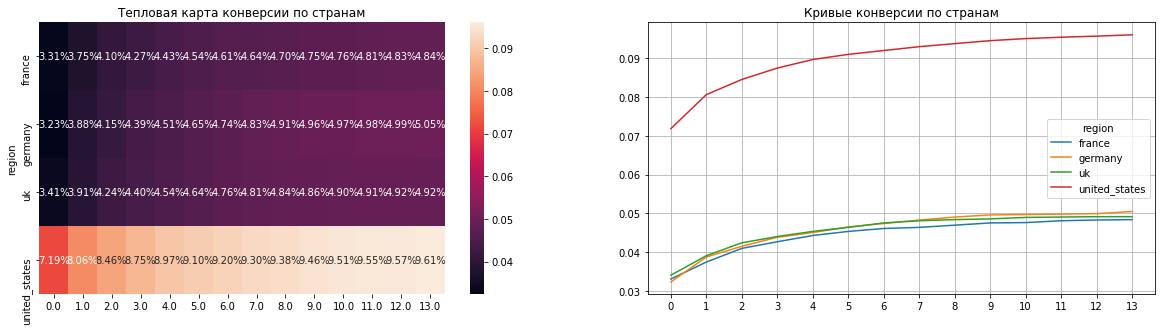

In [102]:
plt.figure(figsize = (20, 5)) # задаём размер «подложки»

# Исключаем размеры когорт
# Конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # В первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по странам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # Во второй — кривые конверсии
plt.title('Кривые конверсии по странам')

plt.show() 

Кривые конверсии подтверждают выводы, сделанные по тепловой карте выше.

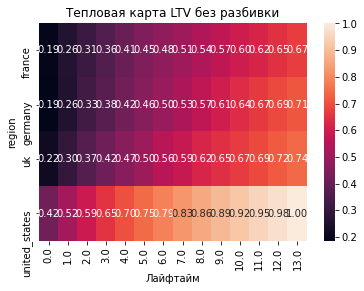

In [103]:
# Рассчитываем LTV и ROI

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_filtred, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

По тепловой карте LTV можно сказать, что пользователи из США имеют самую высокую пожизненную ценность. После по порядку от более ценных пользователей к менее ценным: Великобритания, Германия и Франция.

In [104]:
display(roi);  # таблица ROI

cohort_size       cac       0.0       1.0       2.0       3.0  \
region                                                                         
france               10516  0.459836  0.420645  0.564947  0.677842  0.783319   
germany               9030  0.464898  0.400840  0.556806  0.705411  0.807645   
uk                   10536  0.454922  0.480704  0.652335  0.808109  0.915777   
united_states        58562  1.455876  0.288682  0.356923  0.405928  0.447689   

                    4.0       5.0       6.0       7.0       8.0       9.0  \
region                                                                      
france         0.884863  0.978985  1.046066  1.103029  1.177559  1.241542   
germany        0.909395  0.991414  1.068917  1.148797  1.228449  1.302148   
uk             1.023264  1.107802  1.222385  1.287350  1.371094  1.418984   
united_states  0.483222  0.513729  0.541018  0.567254  0.590622  0.613990   

                   10.0      11.0      12.0      13.0  
region                                                 
france         1.304903  1.352373  1.413265  1.457644  
germany        1.379887  1.432426  1.487111  1.533709  
uk             1.470208  1.521847  1.582249  1.634306  
united_states  0.634347  0.653111  0.670649  0.687776

По таблице выше можно сказать, что пользователи из США имеют самую высокую стоимость привлечения и самые низкие показатели возврата на инвестиции, по таблице видно, что вложения потраченные на привлечение пользователей из США за срок в две недели не окупаются.

Самые высокие показатели ROI имеют пользователи из Великобритании, далее Германия и Франция.

cohort_size       0.0       1.0       2.0       3.0       4.0  \
region                                                                         
france               10516  0.193428  0.259783  0.311696  0.360199  0.406892   
germany               9030  0.186350  0.258858  0.327945  0.375473  0.422776   
uk                   10536  0.218683  0.296762  0.367626  0.416607  0.465505   
united_states        58562  0.420285  0.519636  0.590981  0.651779  0.703511   

                    5.0       6.0       7.0       8.0       9.0      10.0  \
region                                                                      
france         0.450173  0.481019  0.507213  0.541484  0.570906  0.600042   
germany        0.460907  0.496938  0.534074  0.571104  0.605367  0.641507   
uk             0.503964  0.556090  0.585644  0.623741  0.645527  0.668830   
united_states  0.747926  0.787655  0.825852  0.859873  0.893893  0.923530   

                   11.0      12.0      13.0  
region                                       
france         0.621870  0.649871  0.670278  
germany        0.665932  0.691355  0.713019  
uk             0.692322  0.719800  0.743481  
united_states  0.950849  0.976382  1.001316

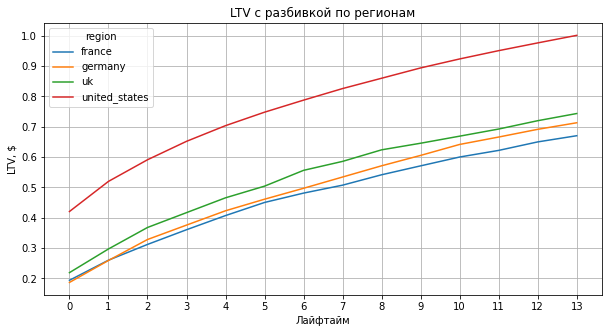

In [105]:
# находим LTV с разбивкой по регионам привлечения
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtred, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

# таблица LTV
display(ltv)

# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по регионам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

По графику и таблице выше видно, что пользователи из США имеют значительно более высокую пожизненную ценность, чем пользователи из других регионов. Далее от более ценных к менее ценным: Великобритания, Германия и Франция.

**Рассчитаем средний CAC по каждому региону привлечения. Для этого сгруппируем отфильтрованные профили и применим функцию mean() к значениям столбца acquisition_cost. Сохраним результат в переменную cac, изменив название столбца acquisition_cost на cac.**

In [106]:
# Считаем средний CAC по регионам привлечения
cac = (
    ltv_profiles.groupby('region')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)

cac

cac
region                 
france         0.459836
germany        0.464898
uk             0.454922
united_states  1.455876

По таблице видно, что средняя стоимость привлечения пользователей из США примерно в три раза выше стоимость привлечения пользователей из других регионов. Стоимость привлечения пользователей из Великобритании, Франции и Германии отличается не значительно.

**С предварительными расчётами всё — можно считать ROI. Разделим каждую ячейку из таблицы LTV на соответствующую ячейку в столбце cac из таблицы CAC, вызвав метод div() и передав параметру axis значение 0.**

In [107]:
roi = ltv.div(cac['cac'], axis=0)
roi

cohort_size       0.0       1.0       2.0       3.0       4.0  \
region                                                                          
france         22869.000193  0.420645  0.564947  0.677842  0.783319  0.884863   
germany        19423.595670  0.400840  0.556806  0.705411  0.807645  0.909395   
uk             23160.021923  0.480704  0.652335  0.808109  0.915777  1.023264   
united_states  40224.579713  0.288682  0.356923  0.405928  0.447689  0.483222   

                    5.0       6.0       7.0       8.0       9.0      10.0  \
region                                                                      
france         0.978985  1.046066  1.103029  1.177559  1.241542  1.304903   
germany        0.991414  1.068917  1.148797  1.228449  1.302148  1.379887   
uk             1.107802  1.222385  1.287350  1.371094  1.418984  1.470208   
united_states  0.513729  0.541018  0.567254  0.590622  0.613990  0.634347   

                   11.0      12.0      13.0  
region                                       
france         1.352373  1.413265  1.457644  
germany        1.432426  1.487111  1.533709  
uk             1.521847  1.582249  1.634306  
united_states  0.653111  0.670649  0.687776

**Затраты на привлечение органических пользователей нулевые, поэтому они всегда окупаются. А раз так, исключим их — удалим из результата все строки, в которых размер когорты равен бесконечности, применяя метод isin() и оператор ~. Сравнивать значения с бесконечностью в Python позволяет переменная inf из библиотеки numpy.**

In [108]:
roi = roi[~roi['cohort_size'].isin([np.inf])]
roi

cohort_size       0.0       1.0       2.0       3.0       4.0  \
region                                                                          
france         22869.000193  0.420645  0.564947  0.677842  0.783319  0.884863   
germany        19423.595670  0.400840  0.556806  0.705411  0.807645  0.909395   
uk             23160.021923  0.480704  0.652335  0.808109  0.915777  1.023264   
united_states  40224.579713  0.288682  0.356923  0.405928  0.447689  0.483222   

                    5.0       6.0       7.0       8.0       9.0      10.0  \
region                                                                      
france         0.978985  1.046066  1.103029  1.177559  1.241542  1.304903   
germany        0.991414  1.068917  1.148797  1.228449  1.302148  1.379887   
uk             1.107802  1.222385  1.287350  1.371094  1.418984  1.470208   
united_states  0.513729  0.541018  0.567254  0.590622  0.613990  0.634347   

                   11.0      12.0      13.0  
region                                       
france         1.352373  1.413265  1.457644  
germany        1.432426  1.487111  1.533709  
uk             1.521847  1.582249  1.634306  
united_states  0.653111  0.670649  0.687776

**Восстановим столбец с размерами когорт после деления на CAC.**

In [109]:
roi.loc[:, 'cohort_size'] = ltv['cohort_size']
display(roi);

cohort_size       0.0       1.0       2.0       3.0       4.0  \
region                                                                         
france               10516  0.420645  0.564947  0.677842  0.783319  0.884863   
germany               9030  0.400840  0.556806  0.705411  0.807645  0.909395   
uk                   10536  0.480704  0.652335  0.808109  0.915777  1.023264   
united_states        58562  0.288682  0.356923  0.405928  0.447689  0.483222   

                    5.0       6.0       7.0       8.0       9.0      10.0  \
region                                                                      
france         0.978985  1.046066  1.103029  1.177559  1.241542  1.304903   
germany        0.991414  1.068917  1.148797  1.228449  1.302148  1.379887   
uk             1.107802  1.222385  1.287350  1.371094  1.418984  1.470208   
united_states  0.513729  0.541018  0.567254  0.590622  0.613990  0.634347   

                   11.0      12.0      13.0  
region                                       
france         1.352373  1.413265  1.457644  
germany        1.432426  1.487111  1.533709  
uk             1.521847  1.582249  1.634306  
united_states  0.653111  0.670649  0.687776

По таблице выше можно сказать, что пользователи, привлеченные из США не окупаются за срок в 14 дней.

Показатели ROI от лучших к худшим: 

Великобритания
Германия
Франция

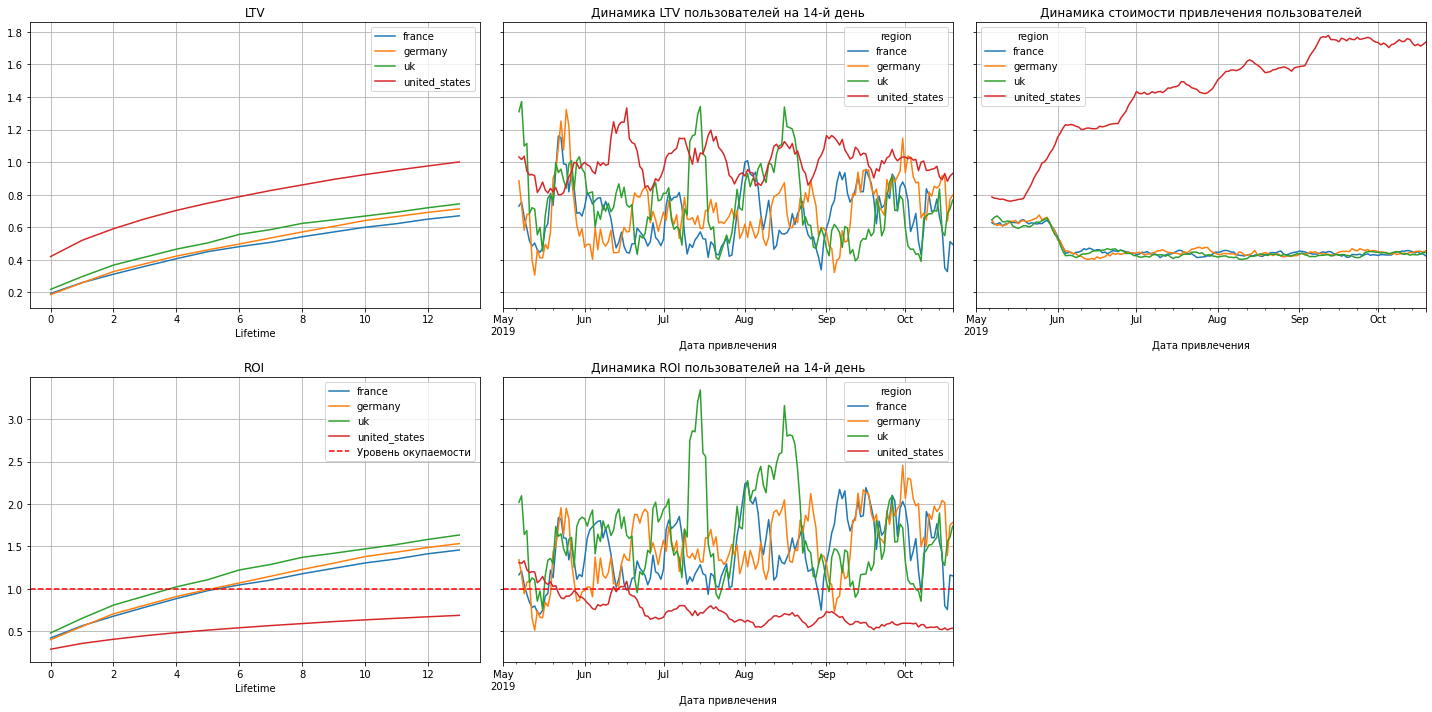

In [110]:
# Строим графики

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14)

По грфикам выше видно, что пользователи из США имеют самую высокую пожизненную ценность, относительно пользователей из других регионов, являются самыми дорогими, стоимость их привлечения стабильно растёт с мая. Но так же эти пользователи не окупают инвестиции, вложенные на их привлечение. По всем метрикам пользователи, привлеченные из США имеют аномальные показатели.

По Великобритании, Германии и Франции картина примерно одинаковая. Пользователи из этих регионов стабильно приносят прибыль и затраты на их привлечение стабильно окупаются.

В момент, когда началось повышение стоимости привлечения пользователей из США, заметно снижение стоимости привлечения пользователей из других регионов.

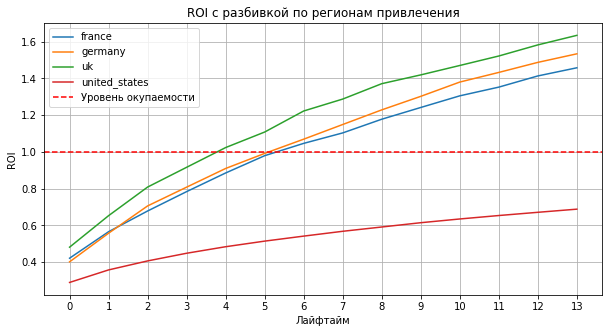

In [111]:
report = roi.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))

plt.title('ROI с разбивкой по регионам привлечения')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

Выше график ROI крупным планом, на котором видно канал по которому не происходит возврата на на инвестиции. 

**Анализ по устройствам:**

**Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI:**

cohort_size    0         1         2         3         4  \
payer device                                                              
False android        18988  1.0  0.174953  0.086476  0.051928  0.031336   
      iphone         29276  1.0  0.178098  0.086829  0.052774  0.034533   
      mac            16150  1.0  0.179195  0.085635  0.049412  0.033065   
      pc             16920  1.0  0.174704  0.087234  0.052364  0.034574   
True  android         1695  1.0  0.384661  0.298525  0.250147  0.214159   

                      5         6         7         8         9        10  \
payer device                                                                
False android  0.024015  0.017485  0.013798  0.011060  0.010006  0.007742   
      iphone   0.025857  0.019436  0.014039  0.011921  0.009940  0.007310   
      mac      0.023901  0.019505  0.014551  0.012755  0.009102  0.007988   
      pc       0.024232  0.017790  0.014539  0.011170  0.008747  0.007033   
True  android  0.206490  0.156342  0.166372  0.146903  0.137463  0.132743   

                     11        12        13  
payer device                                 
False android  0.006530  0.005477  0.005056  
      iphone   0.006832  0.006319  0.004372  
      mac      0.006440  0.006254  0.004025  
      pc       0.005437  0.005851  0.005556  
True  android  0.110914  0.128614  0.107375

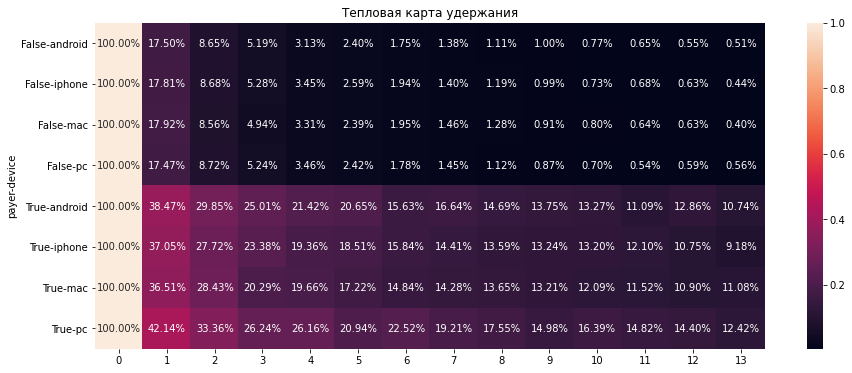

In [112]:
retention_raw, retention, retention_history = get_retention(
    profiles_filtred, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)


display(retention.head(5));

# Строим хитмэп с учётом горизонта анализа

plt.figure(figsize = (15, 6))  # задаём размер графика
sns.heatmap(retention.drop(columns = ['cohort_size']), # удаляем размеры когорт
            annot = True,  # включаем подписи
            fmt = '.2%'  # отображаем значения в виде процентов
           )
plt.title('Тепловая карта удержания')  # название графика
plt.show()

По тепловой карте выше можно сказать, что самое высокое удержание имеют пользователи PC. Дальше по убыванию: Mac, Android и Iphone. Аномальных разрывов по LTV в разбивке по устройствам не видно.

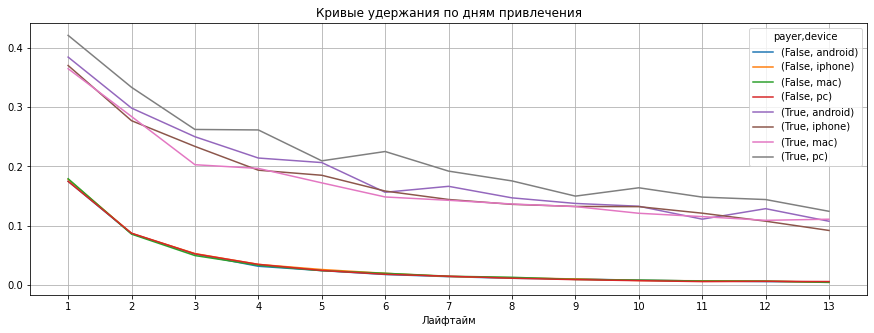

In [113]:
# Строим кривые удержания

report = retention.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # Добавляем сетку
    xticks=list(report.columns.values),  # Отметки на оси X — названия колонок
    figsize=(15, 5),  # Размер графика
)
plt.xlabel('Лайфтайм')  # Название оси X
plt.title('Кривые удержания по дням привлечения')  # Название графика
plt.show()

Крывые удержания подтверждают выводы, сделанные по тепловой карте выше.

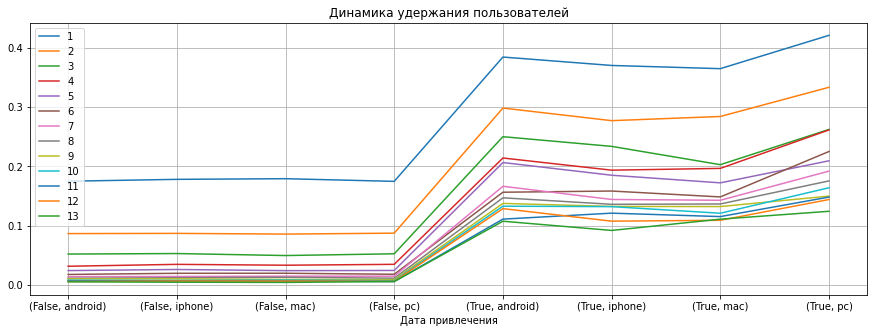

In [114]:
# Строим графики изменений

report = retention.drop(columns=['cohort_size', 0])

report.plot(grid=True, figsize=(15, 5))
plt.xlabel('Дата привлечения')
plt.title('Динамика удержания пользователей')
plt.show()

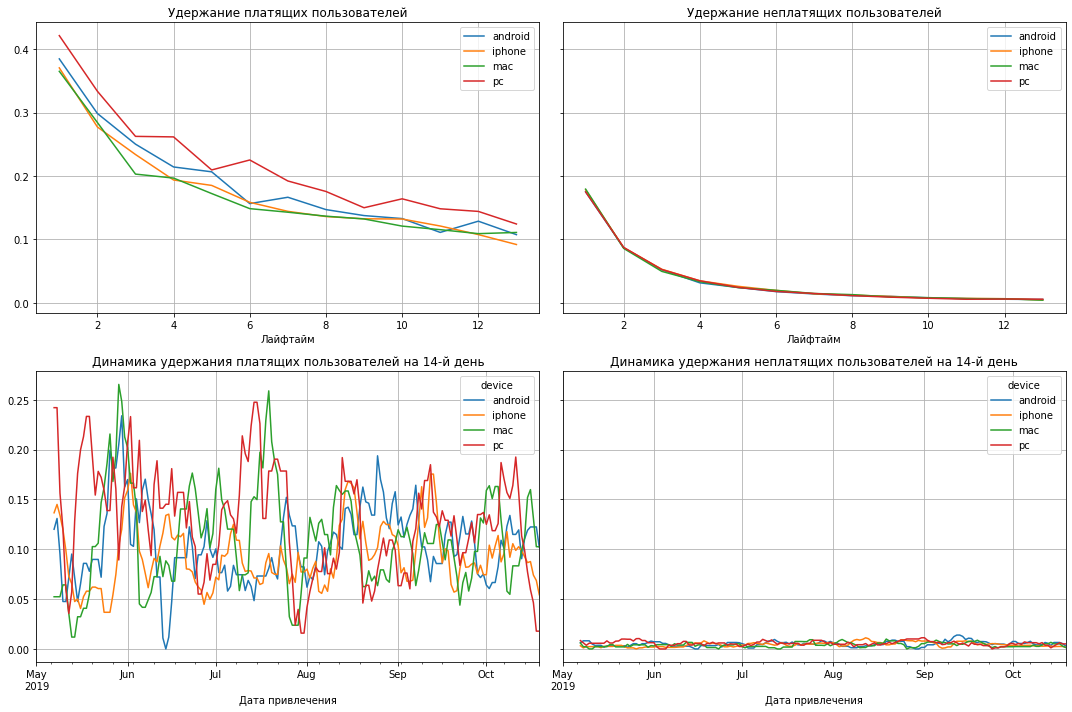

In [115]:
plot_retention(retention, retention_history, 14)

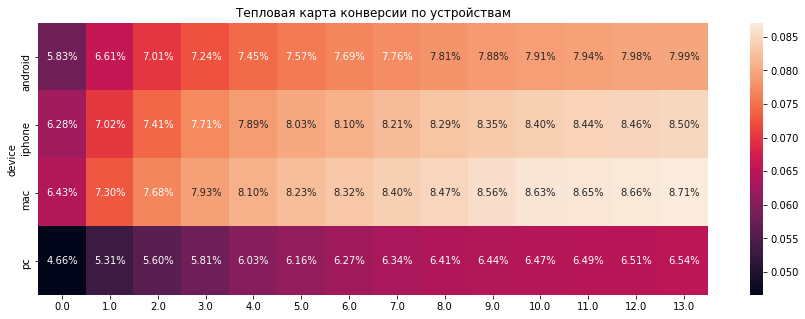

In [116]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_filtred, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

# Строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по устройствам')
plt.show() 

На тепловой карте выше видно, что пользователи PC обладают самой низкой конверсией. Самая высокая конверсия у пользователей Mac. 

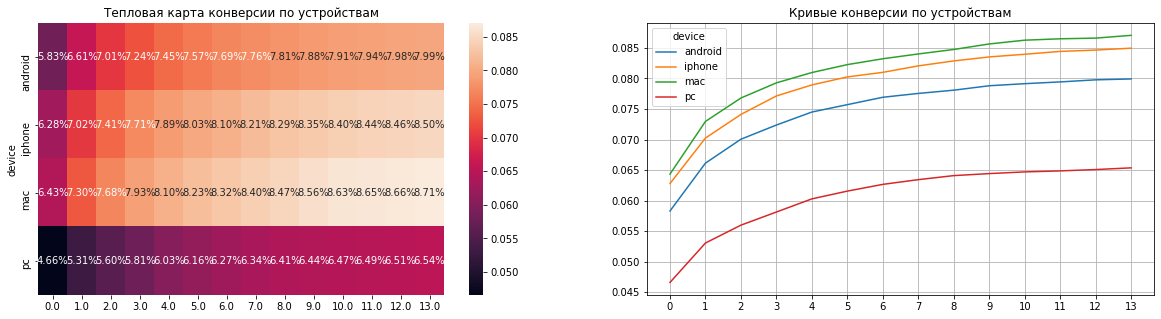

In [117]:
plt.figure(figsize = (20, 5)) # задаём размер «подложки»

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по устройствам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по устройствам')

plt.show() 

Кривые конверсии подтверждают вывод о том, что пользователи PC гораздо реже пользователей других типов устройств становятся платящими.

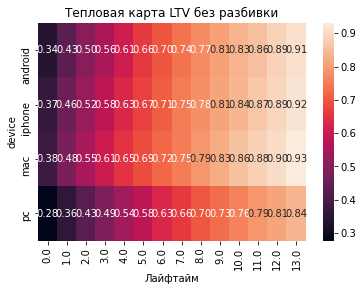

In [118]:
# Рассчитываем LTV и ROI

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_filtred, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

По тепловой карте без разбивки можно сказать, что пользователи PC имеют самую низкую пожизненную ценность. Самую высокую имеют пользователи Mac. 

In [119]:
display(roi);  # Таблица ROI

cohort_size       cac       0.0       1.0       2.0       3.0  \
device                                                                   
android        20683  1.019759  0.332645  0.422419  0.490517  0.544460   
iphone         32086  1.277021  0.288114  0.357321  0.410253  0.456661   
mac            17747  1.276219  0.299506  0.376283  0.431058  0.474117   
pc             18128  0.792724  0.349933  0.456068  0.542966  0.612637   

              4.0       5.0       6.0       7.0       8.0       9.0      10.0  \
device                                                                          
android  0.596376  0.648580  0.686250  0.724251  0.758989  0.791216  0.817714   
iphone   0.495005  0.527449  0.556536  0.587035  0.610762  0.636023  0.658115   
mac      0.510255  0.537354  0.565601  0.589926  0.619766  0.646735  0.671809   
pc       0.680712  0.733701  0.796291  0.835044  0.884297  0.920135  0.960624   

             11.0      12.0      13.0  
device                                 
android  0.839481  0.870765  0.894425  
iphone   0.679258  0.700380  0.718064  
mac      0.692961  0.708825  0.729139  
pc       0.994933  1.024449  1.054801

cohort_size       0.0       1.0       2.0       3.0       4.0  \
device                                                                   
android        20683  0.339218  0.430766  0.500209  0.555218  0.608159   
iphone         32086  0.367928  0.456307  0.523902  0.583165  0.632132   
mac            17747  0.382235  0.480219  0.550124  0.605077  0.651197   
pc             18128  0.277400  0.361536  0.430422  0.485652  0.539617   

              5.0       6.0       7.0       8.0       9.0      10.0      11.0  \
device                                                                          
android  0.661395  0.699810  0.738562  0.773986  0.806850  0.833871  0.856068   
iphone   0.673563  0.710708  0.749656  0.779956  0.812214  0.840427  0.867426   
mac      0.685782  0.721831  0.752874  0.790957  0.825376  0.857376  0.884370   
pc       0.581623  0.631240  0.661959  0.701004  0.729414  0.761510  0.788708   

             12.0      13.0  
device                       
android  0.887970  0.912098  
iphone   0.894400  0.916983  
mac      0.904617  0.930541  
pc       0.812106  0.836167

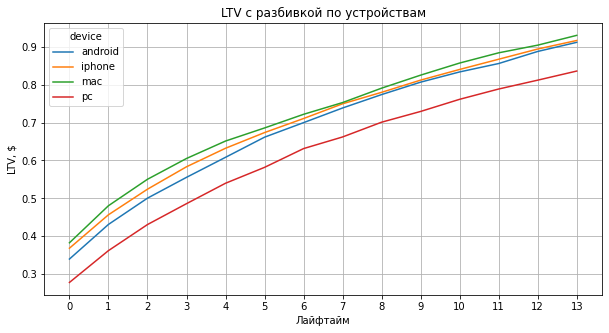

In [120]:
# Находим LTV с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtred, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

# Таблица LTV
display(ltv)

# Кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по устройствам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

По графику и таблице выше можно так же сказать, что пользователи PC имеют более низкий LTV, чем пользователи других типов устройств.

**Рассчитаем средний CAC по каждому типу устройства. Для этого сгруппируем отфильтрованные профили и применим функцию mean() к значениям столбца acquisition_cost. Сохраним результат в переменную cac, изменив название столбца acquisition_cost на cac.**

In [121]:
# Считаем средний CAC по устройствам
cac = (
    ltv_profiles.groupby('device')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)

cac

cac
device           
android  1.019759
iphone   1.277021
mac      1.276219
pc       0.792724

По таблице выше видно, что пользователи PC имеют более низкую среднюю стоимость привлечения, чем пользователи других типов устройств. Самыми дорогими являются пользователи Iphone и Mac.

**С предварительными расчётами всё — можно считать ROI. Разделим каждую ячейку из таблицы LTV на соответствующую ячейку в столбце cac из таблицы CAC, вызвав метод div() и передав параметру axis значение 0.**

In [122]:
roi = ltv.div(cac['cac'], axis=0)
roi

cohort_size       0.0       1.0       2.0       3.0       4.0  \
device                                                                    
android  20282.244860  0.332645  0.422419  0.490517  0.544460  0.596376   
iphone   25125.660644  0.288114  0.357321  0.410253  0.456661  0.495005   
mac      13905.920356  0.299506  0.376283  0.431058  0.474117  0.510255   
pc       22867.974352  0.349933  0.456068  0.542966  0.612637  0.680712   

              5.0       6.0       7.0       8.0       9.0      10.0      11.0  \
device                                                                          
android  0.648580  0.686250  0.724251  0.758989  0.791216  0.817714  0.839481   
iphone   0.527449  0.556536  0.587035  0.610762  0.636023  0.658115  0.679258   
mac      0.537354  0.565601  0.589926  0.619766  0.646735  0.671809  0.692961   
pc       0.733701  0.796291  0.835044  0.884297  0.920135  0.960624  0.994933   

             12.0      13.0  
device                       
android  0.870765  0.894425  
iphone   0.700380  0.718064  
mac      0.708825  0.729139  
pc       1.024449  1.054801

**Затраты на привлечение органических пользователей нулевые, поэтому они всегда окупаются. А раз так, исключим их — удалим из результата все строки, в которых размер когорты равен бесконечности, применяя метод isin() и оператор ~. Сравнивать значения с бесконечностью в Python позволяет переменная inf из библиотеки numpy.**

In [123]:
roi = roi[~roi['cohort_size'].isin([np.inf])]
roi

cohort_size       0.0       1.0       2.0       3.0       4.0  \
device                                                                    
android  20282.244860  0.332645  0.422419  0.490517  0.544460  0.596376   
iphone   25125.660644  0.288114  0.357321  0.410253  0.456661  0.495005   
mac      13905.920356  0.299506  0.376283  0.431058  0.474117  0.510255   
pc       22867.974352  0.349933  0.456068  0.542966  0.612637  0.680712   

              5.0       6.0       7.0       8.0       9.0      10.0      11.0  \
device                                                                          
android  0.648580  0.686250  0.724251  0.758989  0.791216  0.817714  0.839481   
iphone   0.527449  0.556536  0.587035  0.610762  0.636023  0.658115  0.679258   
mac      0.537354  0.565601  0.589926  0.619766  0.646735  0.671809  0.692961   
pc       0.733701  0.796291  0.835044  0.884297  0.920135  0.960624  0.994933   

             12.0      13.0  
device                       
android  0.870765  0.894425  
iphone   0.700380  0.718064  
mac      0.708825  0.729139  
pc       1.024449  1.054801

**Восстановим столбец с размерами когорт после деления на CAC.**

In [124]:
roi.loc[:, 'cohort_size'] = ltv['cohort_size']
display(roi);

cohort_size       0.0       1.0       2.0       3.0       4.0  \
device                                                                   
android        20683  0.332645  0.422419  0.490517  0.544460  0.596376   
iphone         32086  0.288114  0.357321  0.410253  0.456661  0.495005   
mac            17747  0.299506  0.376283  0.431058  0.474117  0.510255   
pc             18128  0.349933  0.456068  0.542966  0.612637  0.680712   

              5.0       6.0       7.0       8.0       9.0      10.0      11.0  \
device                                                                          
android  0.648580  0.686250  0.724251  0.758989  0.791216  0.817714  0.839481   
iphone   0.527449  0.556536  0.587035  0.610762  0.636023  0.658115  0.679258   
mac      0.537354  0.565601  0.589926  0.619766  0.646735  0.671809  0.692961   
pc       0.733701  0.796291  0.835044  0.884297  0.920135  0.960624  0.994933   

             12.0      13.0  
device                       
android  0.870765  0.894425  
iphone   0.700380  0.718064  
mac      0.708825  0.729139  
pc       1.024449  1.054801

По таблице выше можно сказать, что окупаются только те инвестиции, которые были потрачены на привлечение пользователей PC, инвестиции потраченные на привлечение пользователей других типов устройств не окупились.

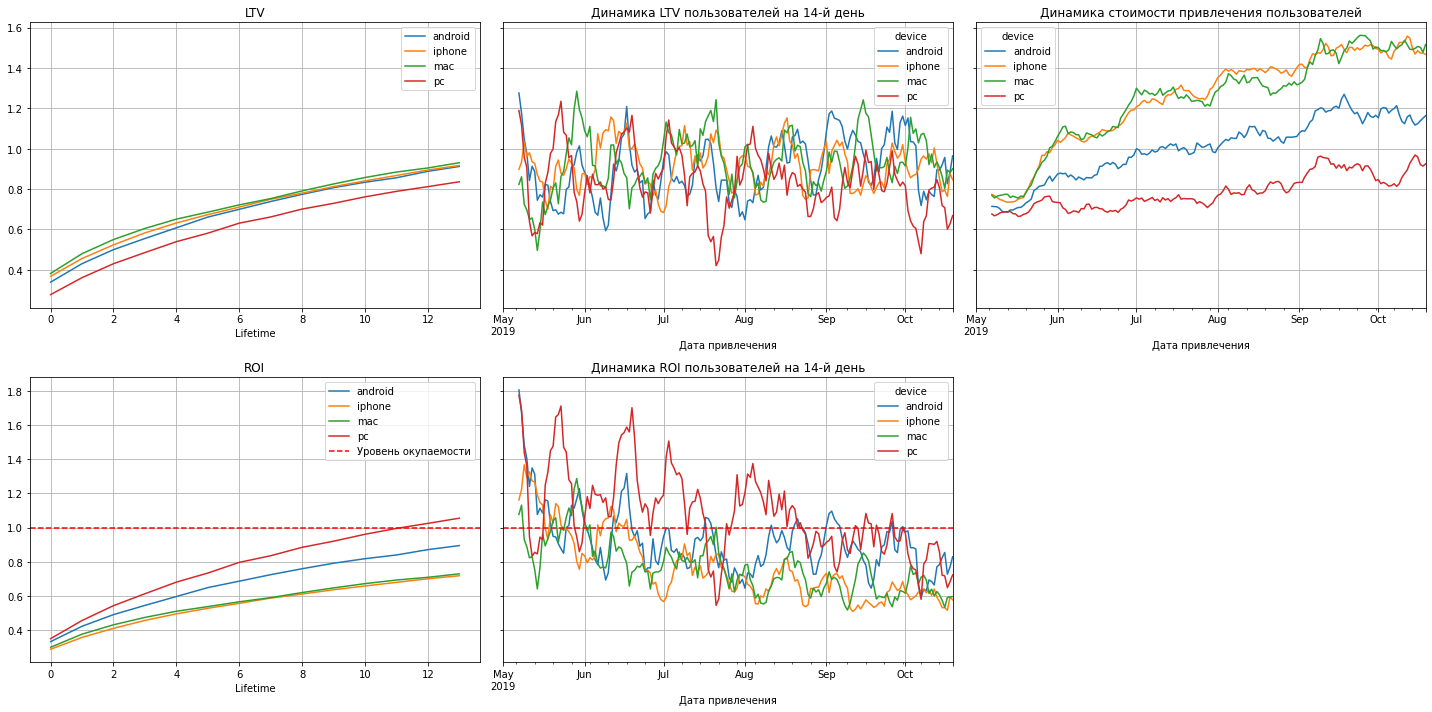

In [125]:
# Строим графики

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14)

По графикам выше можно сказать, что пользователи PC имеют самую низкую пожизненную ценность относительно пользователей других типов устройств, при этом стоимость привлечения пользователей PC - самая низкая и инвестиции, направленные на привлечение пользователей PC - единственные, которые окупились.

Хоть пользователи Android, Iphone и Mac имеют LTV выше, чем у пользователей PC (Самый высокий показатель LTV у пользователей Mac), они имеют высокую стоимость (выше остальных стоимость привлечения пользователей Iphone и Mac) и не окупают вложенные на привлечение инвестиции.

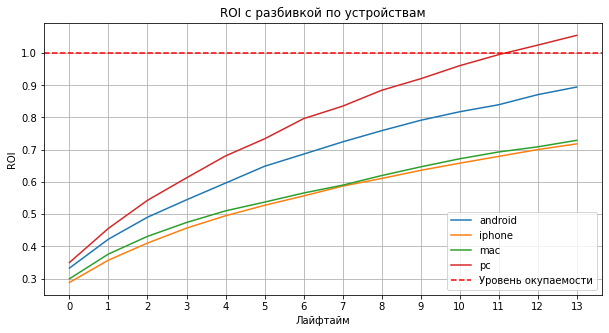

In [126]:
report = roi.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))

plt.title('ROI с разбивкой по устройствам')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

### Напишем выводы

- Выделим причины неэффективности привлечения пользователей.
- Сформулируем рекомендации для отдела маркетинга.

**Напомню цели исследования:**

Требовалось изучить:

* Откуда приходят пользователи и какими устройствами они пользуются
* Сколько стоит привлечение пользователей из различных рекламных каналов
* Сколько денег приносит каждый клиент
* Когда расходы на привлечение клиента окупаются
* Какие факторы мешают привлечению клиентов

In [127]:
display(profiles['channel'].unique());

array(['faceboom', 'organic', 'adnonsense', 'yrabbit', 'mediatornado',
       'rocketsuperads', 'leapbob', 'tiptop', 'wahoonetbanner',
       'opplecreativemedia', 'lambdamediaads'], dtype=object)

**Пользователи приходят из следующих каналов:**

* faceboom 
* organic
* adnonsense
* yrabbit
* mediatornado
* rocketsuperads
* leapbob
* tiptop
* wahoonetbanner
* opplecreativemedia
* lambdamediaads

**Причём окупаются только пользователи пришедшие из всех каналов, кроме:**

* tiptop
* faceboom
* adnosense

**Первая тройка лидеров по окупаемости:**

* adnosense
* mediatornado
* lambdamediaads

**Сколько стоит привлечение пользователей из различных рекламных каналов:**

In [128]:
cac

cac
device           
android  1.019759
iphone   1.277021
mac      1.276219
pc       0.792724

**С предварительными расчётами всё — можно считать ROI. Разделим каждую ячейку из таблицы LTV на соответствующую ячейку в столбце cac из таблицы CAC, вызвав метод div() и передав параметру axis значение 0.**

В таблице выше приведена средняя стоимость привлечения одного пользователя в разбивке по каналам привлечения.

**Сколько денег приносит каждый клиент:**

In [129]:
ltv_history

cohort_size       0.0       1.0       2.0       3.0  \
device  dt                                                                
android 2019-05-01           95  0.367684  0.472737  0.525263  0.630316   
        2019-05-02           73  0.136712  1.026575  1.094932  1.094932   
        2019-05-03           89  0.224270  0.392472  0.560674  0.728876   
        2019-05-04          101  0.543465  0.691683  0.741089  0.790495   
        2019-05-05          103  0.193786  0.679126  0.679126  0.727573   
...                         ...       ...       ...       ...       ...   
pc      2019-10-15           89  0.392472  0.560674  0.616742  0.841124   
        2019-10-16           87  0.114713  0.172069  0.240920  0.298276   
        2019-10-17           93  0.053656  0.053656  0.591183  0.591183   
        2019-10-18          125  0.199600  0.199600  0.279440  0.319360   
        2019-10-19          122  0.163607  0.294508  0.376311  0.376311   

                         4.0       5.0       6.0       7.0       8.0  \
device  dt                                                             
android 2019-05-01  0.682842  0.682842  0.682842  0.787895  0.945474   
        2019-05-02  1.094932  1.300137  1.300137  1.436849  1.436849   
        2019-05-03  0.841011  0.841011  0.841011  0.841011  0.953146   
        2019-05-04  0.938713  1.037525  1.086931  1.235149  1.284554   
        2019-05-05  0.727573  0.776019  0.776019  0.776019  0.776019   
...                      ...       ...       ...       ...       ...   
pc      2019-10-15  0.897191  0.897191  0.897191  0.897191  0.897191   
        2019-10-16  0.298276  0.355632  0.412989  0.412989  0.412989   
        2019-10-17  0.591183  0.591183  0.591183  0.591183  0.591183   
        2019-10-18  0.319360  0.439120  0.479040  0.518960  0.598800   
        2019-10-19  0.417213  0.417213  0.458115  0.458115  0.539918   

                         9.0      10.0      11.0      12.0      13.0  
device  dt                                                            
android 2019-05-01  0.998000  0.998000  1.103053  1.155579  1.208105  
        2019-05-02  1.505205  1.573562  1.573562  1.573562  1.641918  
        2019-05-03  0.953146  1.009213  1.065281  1.121348  1.177416  
        2019-05-04  1.333960  1.383366  1.482178  1.482178  1.482178  
        2019-05-05  0.776019  0.824466  0.824466  0.872913  0.872913  
...                      ...       ...       ...       ...       ...  
pc      2019-10-15  0.897191  0.953258  0.953258  0.953258  0.953258  
        2019-10-16  0.412989  0.412989  0.412989  0.527701  0.527701  
        2019-10-17  0.591183  0.644839  0.644839  0.644839  0.644839  
        2019-10-18  0.598800  0.598800  0.678640  0.718560  0.718560  
        2019-10-19  0.539918  0.539918  0.621721  0.621721  0.621721  

[688 rows x 15 columns]

**Когда расходы на привлечение клиента окупаются:**

Расходы на привлечение клиента окупаются, когда показатель ROI превышает уровень окупаемости. 

В нашем случае уровень окупаемости показатель ROI превышает только у пользователей пришедших из всех источников, кроме:

* tiptop
* faceboom
* adnosense

Соответственно эти источники выглядят менее перспективными для проведения будущих рекламных кампаний.

Более перспективными источниками являются:

* adnosense
* mediatornado
* lambdamediaads

**Какие факторы мешают привлечению клиентов:**



Я полагаю, что привлечению клиентов мешает, в первую очередь фактор нерационального разделения бюджета на проведение рекламных кампаний. Три источника из нашего исследования не привлекают пользователей ROI которых не превышает уровень окупаемости, есть источник, с аномальным увеличением расходов на привлечение.

Я бы рекомендовал распределить бюджет в пользу более эффективных рекламных ресурсов и более детально изучить расходы на привлечение пользователей из канала "tiptop".

**Выводы по результатам анализа LTV, CAC и ROI в разбивке по регионам привлечения:**

По графикам выше видно, что пользователи из США имеют самую высокую пожизненную ценность, относительно пользователей из других регионов, являются самыми дорогими, стоимость их привлечения стабильно растёт с мая. Но так же эти пользователи не окупают инвестиции, вложенные на их привлечение. По всем метрикам пользователи, привлеченные из США имеют аномальные показатели. При этом конверсия пользователей из США почти в два раза выше конверсии пользователей из других регионов.

По Великобритании, Германии и Франции картина примерно одинаковая. Пользователи из этих регионов стабильно приносят прибыль и затраты на их привлечение стабильно окупаются.

В момент, когда началось повышение стоимости привлечения пользователей из США, заметно снижение стоимости привлечения пользователей из других регионов.

**Выводы по результатам анализа LTV, CAC и ROI в разбивке типам устройств:**

Можно сказать, что пользователи PC имеют самую низкую пожизненную ценность относительно пользователей других типов устройств, при этом стоимость привлечения пользователей PC - самая низкая и инвестиции, направленные на привлечение пользователей PC - единственные, которые окупились.

Хоть пользователи Android, Iphone и Mac имеют LTV выше, чем у пользователей PC (Самый высокий показатель LTV у пользователей Mac), они имеют высокую стоимость (выше остальных стоимость привлечения пользователей Iphone и Mac) и не окупают вложенные на привлечение инвестиции.

#### Рекомендации для отдела маркетинга:

**1. Перераспределить бюджет на проведение рекламных кампаний в пользу источников:**
    
* adnosense
* mediatornado
* lambdamediaads

**2. Обратить внимание по какой причине стабильно повышаются расходы на привлечение пользователей по каналу "tiptop":**

* ROI пользователей, привлеченных на сервисе "tiptop" самый низкий при том, что расходы на этот источник  самые высокие и стабильно растут. Расходы на привлечение пользователей из других ресурсов со временем почти неизменны.

**3. Поработать над конверсиями пользователей во Франции и Германии, полагаясь на успешный пример США.**

**4. Поработать над увеличением удержания платящих пользователей на платформах Mac и Iphone по примеру успешной платформы PC.**

**5. Обратить внимание по какой причине стабильно повышаются расходы на привлечение пользователей из США**

**6. Перераспределить рекламный бюджет в пользу привлечения пользователей из регионов инвестиции на привлечение которых окупаются, либо поработать над типом проведения рекламных кампаний в США. Пользователи из США выглядят перспективными, возможно дело в способе проведения рекламных кампаний.**

**7. Увеличить инвестиции на привлечение пользователей, которые используют PC, так как инвестиции на привлечение этих пользователей окупаются. Инвестиции на привлечение пользователей других типов устройств не окупаются.**

**8. Скорректировать методику проведения рекламных кампаний, направленных на привлечение пользователей Android, Iphone и Mac, а так же бюджет, направленный на проведение этих рекламных кампаний.**